# Reading the data

In [1]:
#echo 1 >/proc/sys/vm/

In [2]:
# Used the below command to sync the S3 files to EC2 instance.
# S3FullAccess Role was assigned to EC2
# aws s3 sync 

In [3]:
## Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta
from dateutil import rrule
import warnings
warnings.filterwarnings('ignore')

# Cleaning the data

### Event Data

In [5]:
# Reading the data
event_data = "capstone-data/event-data/000000_0"

df_event = df = pd.read_csv(event_data,encoding = "ISO-8859-1",names=["Device_id", "Gender", "Age", "Group",
                                                                 "Event_id","Event_timestamp","Longitude","Latitude"])

In [6]:
# Printing top 5 rows
df_event.head(5)

,Device_id,Gender,Age,Group,Event_id,Event_timestamp,Longitude,Latitude
0,-1000369272589010000,F,26,F25-32,\N,\N,\N,\N
1,-1000572055892390000,F,27,F25-32,\N,\N,\N,\N
2,-1000643208750510000,M,29,M25-32,\N,\N,\N,\N
3,-1001337759327040000,M,30,M25-32,2774404,2016-05-07 09:14:24,119.61,29.7
4,-1001337759327040000,M,30,M25-32,3065018,2016-05-04 10:26:14,120.29,30.42


In [7]:
# See data statistics
df_event.describe()

,Device_id,Age
count,1.266933e+06,1.266933e+06
mean,-2.967925e+16,3.340051e+01
std,5.322606e+18,9.762003e+00
min,-9.223067e+18,1.000000e+00
25%,-4.668347e+18,2.600000e+01
50%,-1.115514e+17,3.100000e+01
75%,4.631837e+18,3.900000e+01
max,9.222849e+18,9.600000e+01


In [8]:
# Checking shape of the data
df_event.shape

(1266933, 8)

In [9]:
# Checking null values
df_event.isnull().sum()

Device_id          0
Gender             0
Age                0
Group              0
Event_id           0
Event_timestamp    0
Longitude          0
Latitude           0
dtype: int64

In [10]:
# Percentage of Null
round(100*(df_event.isnull().sum()/len(df_event.index)), 2)

Device_id          0.0
Gender             0.0
Age                0.0
Group              0.0
Event_id           0.0
Event_timestamp    0.0
Longitude          0.0
Latitude           0.0
dtype: float64

In [11]:
# Checking for duplicate entries
dup = df_event.duplicated(subset=None, keep='first').sum()
dup

0

In [12]:
# Making sure null is not there again using isna()
df_event.isna().sum()

Device_id          0
Gender             0
Age                0
Group              0
Event_id           0
Event_timestamp    0
Longitude          0
Latitude           0
dtype: int64

In [13]:
# Checking value count for device_ids
count = df_event["Event_id"].value_counts()
count

\N         51335
227554         1
2481375        1
3056809        1
2054355        1
           ...  
336734         1
677046         1
1311058        1
3061707        1
3131154        1
Name: Event_id, Length: 1215599, dtype: int64

#### Looks like events_data has many device_id which has no events. This is because we did a left join when exporting the data to CSV. We need to remove the rows/device_ids which does not have any events associated

In [14]:
# Displaying percetage of rows without any events
device_perc_no_events = round(100*(51335/1266933))
device_perc_no_events

4

In [15]:
# Percentage of rows which has events associated
event_device_perc_with_events = round(100*((1266933-51335)/1266933))
event_device_perc_with_events

96

In [16]:
# Let us replace the null (\N) values with empty string as it causes issues during EDA
df_event = df_event.replace(r'\\N'," ", regex=True)

In [17]:
df_event

,Device_id,Gender,Age,Group,Event_id,Event_timestamp,Longitude,Latitude
0,-1000369272589010000,F,26,F25-32,,,,
1,-1000572055892390000,F,27,F25-32,,,,
2,-1000643208750510000,M,29,M25-32,,,,
3,-1001337759327040000,M,30,M25-32,2774404,2016-05-07 09:14:24,119.61,29.7
4,-1001337759327040000,M,30,M25-32,3065018,2016-05-04 10:26:14,120.29,30.42
...,...,...,...,...,...,...,...,...
1266928,99976251796408100,M,43,M32+,839154,2016-05-07 08:33:32,0,0
1266929,99976251796408100,M,43,M32+,2642482,2016-05-07 08:25:59,0,0
1266930,99976251796408100,M,43,M32+,2642573,2016-05-07 08:32:57,0,0
1266931,999861742187156000,M,27,M25-32,,,,


In [18]:
# Now we replace with NaN
df_event = df_event.replace(r'^\s*$', np.nan, regex=True)

In [19]:
df_event

,Device_id,Gender,Age,Group,Event_id,Event_timestamp,Longitude,Latitude
0,-1000369272589010000,F,26,F25-32,NaN,NaN,NaN,NaN
1,-1000572055892390000,F,27,F25-32,NaN,NaN,NaN,NaN
2,-1000643208750510000,M,29,M25-32,NaN,NaN,NaN,NaN
3,-1001337759327040000,M,30,M25-32,2774404,2016-05-07 09:14:24,119.61,29.7
4,-1001337759327040000,M,30,M25-32,3065018,2016-05-04 10:26:14,120.29,30.42
...,...,...,...,...,...,...,...,...
1266928,99976251796408100,M,43,M32+,839154,2016-05-07 08:33:32,0,0
1266929,99976251796408100,M,43,M32+,2642482,2016-05-07 08:25:59,0,0
1266930,99976251796408100,M,43,M32+,2642573,2016-05-07 08:32:57,0,0
1266931,999861742187156000,M,27,M25-32,NaN,NaN,NaN,NaN


#### Check latitude and longitude which has 0 or between -1 to 1 in them

In [20]:
# Rows which has 0 in them
df_event[df_event.Longitude == "0"]

,Device_id,Gender,Age,Group,Event_id,Event_timestamp,Longitude,Latitude
114,-1002595372059170000,M,36,M32+,2925423,2016-05-05 22:00:55,0,0
115,-1002595372059170000,M,36,M32+,386446,2016-05-05 20:02:14,0,0
116,-1002595372059170000,M,36,M32+,1341473,2016-05-05 15:22:02,0,0
117,-1002595372059170000,M,36,M32+,937976,2016-05-05 20:02:48,0,0
118,-1002595372059170000,M,36,M32+,1801543,2016-05-06 11:57:01,0,0
...,...,...,...,...,...,...,...,...
1266908,999208698621622000,M,29,M25-32,3165592,2016-05-01 19:42:49,0,0
1266925,999208698621622000,M,29,M25-32,826059,2016-05-03 20:10:12,0,0
1266928,99976251796408100,M,43,M32+,839154,2016-05-07 08:33:32,0,0
1266929,99976251796408100,M,43,M32+,2642482,2016-05-07 08:25:59,0,0


In [21]:
# Rows which is between -1 to +1
# However this will not work as the datatype is string
df_event.dtypes

Device_id           int64
Gender             object
Age                 int64
Group              object
Event_id           object
Event_timestamp    object
Longitude          object
Latitude           object
dtype: object

In [22]:
# Let's convert latitude and longtitude to float and  other columns to corresponding datatypes
df_event['Longitude'] = df_event['Longitude'].astype('float64')
df_event['Latitude'] = df_event['Latitude'].astype('float64')
df_event.dtypes

Device_id            int64
Gender              object
Age                  int64
Group               object
Event_id            object
Event_timestamp     object
Longitude          float64
Latitude           float64
dtype: object

In [23]:
# Lets take a look at the values for Latitude and Longitude
df_event[(df_event.Longitude != 0.00) & (~df_event.Longitude.isna())]

,Device_id,Gender,Age,Group,Event_id,Event_timestamp,Longitude,Latitude
3,-1001337759327040000,M,30,M25-32,2774404,2016-05-07 09:14:24,119.61,29.70
4,-1001337759327040000,M,30,M25-32,3065018,2016-05-04 10:26:14,120.29,30.42
5,-1001337759327040000,M,30,M25-32,3230344,2016-05-04 10:04:42,120.30,30.41
6,-1001337759327040000,M,30,M25-32,2906128,2016-05-07 10:24:32,119.69,29.80
7,-1001337759327040000,M,30,M25-32,2876843,2016-05-07 10:23:56,119.69,29.80
...,...,...,...,...,...,...,...,...
1266920,999208698621622000,M,29,M25-32,603552,2016-05-03 12:55:40,114.38,27.82
1266921,999208698621622000,M,29,M25-32,12506,2016-05-06 11:58:46,114.39,27.82
1266922,999208698621622000,M,29,M25-32,106222,2016-05-04 16:21:29,114.37,27.82
1266923,999208698621622000,M,29,M25-32,455299,2016-05-01 16:14:24,114.29,27.90


In [24]:
# Storing in a separate dataframe
df_events_invalid_lan_lot = df_event[(df_event.Longitude > -1) & (df_event.Longitude < 1)]
df_events_invalid_lan_lot

,Device_id,Gender,Age,Group,Event_id,Event_timestamp,Longitude,Latitude
114,-1002595372059170000,M,36,M32+,2925423,2016-05-05 22:00:55,0.0,0.0
115,-1002595372059170000,M,36,M32+,386446,2016-05-05 20:02:14,0.0,0.0
116,-1002595372059170000,M,36,M32+,1341473,2016-05-05 15:22:02,0.0,0.0
117,-1002595372059170000,M,36,M32+,937976,2016-05-05 20:02:48,0.0,0.0
118,-1002595372059170000,M,36,M32+,1801543,2016-05-06 11:57:01,0.0,0.0
...,...,...,...,...,...,...,...,...
1266908,999208698621622000,M,29,M25-32,3165592,2016-05-01 19:42:49,0.0,0.0
1266925,999208698621622000,M,29,M25-32,826059,2016-05-03 20:10:12,0.0,0.0
1266928,99976251796408100,M,43,M32+,839154,2016-05-07 08:33:32,0.0,0.0
1266929,99976251796408100,M,43,M32+,2642482,2016-05-07 08:25:59,0.0,0.0


In [25]:
df_event = df_event[~((df_event.Longitude > -1) & (df_event.Longitude < 1))]
df_event

,Device_id,Gender,Age,Group,Event_id,Event_timestamp,Longitude,Latitude
0,-1000369272589010000,F,26,F25-32,NaN,NaN,NaN,NaN
1,-1000572055892390000,F,27,F25-32,NaN,NaN,NaN,NaN
2,-1000643208750510000,M,29,M25-32,NaN,NaN,NaN,NaN
3,-1001337759327040000,M,30,M25-32,2774404,2016-05-07 09:14:24,119.61,29.70
4,-1001337759327040000,M,30,M25-32,3065018,2016-05-04 10:26:14,120.29,30.42
...,...,...,...,...,...,...,...,...
1266924,999208698621622000,M,29,M25-32,323879,2016-05-02 23:12:18,114.38,27.82
1266926,999356919477646000,M,26,M25-32,NaN,NaN,NaN,NaN
1266927,999529955917823000,F,23,F0-24,NaN,NaN,NaN,NaN
1266931,999861742187156000,M,27,M25-32,NaN,NaN,NaN,NaN


### Non Event Data

In [26]:
# Fetching the non event data
non_event_data = "capstone-data/non-event-data/000000_0"
df_non_event = pd.read_csv(non_event_data,encoding = "ISO-8859-1",names=["Device_id", "Gender", "Age", "Group",
                                                                 "device_model","phone_brand"])

In [27]:
# Printing first 5 rows
df_non_event.head(5)

,Device_id,Gender,Age,Group,device_model,phone_brand
0,-7548291590301750000,M,33,M32+,Ã¨ÂÂ£Ã¨â¬â¬3C,Huawei
1,-1819925713085810000,F,23,F0-24,N1 Mini,OPPO
2,3670076507269740000,M,33,M32+,menote1 2,Meizu
3,5333872006968810000,M,34,M32+,xnote,Xiaomi
4,5263633571423510000,M,27,M25-32,hu1 Plus,Huawei


#### There are some invalid characters as we see in 1st row. We will handle this later after EDA

In [28]:
# Checking stats
df_non_event.describe()

,Device_id,Age
count,7.484000e+04,74840.000000
mean,2.381650e+14,31.407924
std,5.327486e+18,9.867279
min,-9.223067e+18,1.000000
25%,-4.617637e+18,25.000000
50%,-1.831665e+16,29.000000
75%,4.638645e+18,36.000000
max,9.222849e+18,96.000000


In [29]:
# Checking the datatypes
df_non_event.dtypes

Device_id        int64
Gender          object
Age              int64
Group           object
device_model    object
phone_brand     object
dtype: object

In [30]:
# Checking dimensions
df_non_event.shape

(74840, 6)

In [31]:
# checking Null values
df_non_event.isnull().sum()

Device_id       0
Gender          0
Age             0
Group           0
device_model    0
phone_brand     0
dtype: int64

In [32]:
# Percentage of null values
round(100*(df_non_event.isnull().sum()/len(df_event.index)), 2)

Device_id       0.0
Gender          0.0
Age             0.0
Group           0.0
device_model    0.0
phone_brand     0.0
dtype: float64

In [33]:
# Checking for duplicates
df_non_event.duplicated(subset=None, keep='first').sum()

194

In [34]:
# Drop duplicates
df_non_event.drop_duplicates(inplace=True)
df_non_event.duplicated(subset=None, keep='first').sum()

0

#### We currently have event and non event devices in event_data itself. However we need the brand data too. So lets merge the non_event dataframe which has the brand information with event dataframe and drop the columns which are repeated

In [35]:
df_all_data = pd.merge(df_event,df_non_event,on ='Device_id',how ='inner')

In [36]:
df_all_data.head(5)

,Device_id,Gender_x,Age_x,Group_x,Event_id,Event_timestamp,Longitude,Latitude,Gender_y,Age_y,Group_y,device_model,phone_brand
0,-1000369272589010000,F,26,F25-32,NaN,NaN,NaN,NaN,F,26,F25-32,Y17T,vivo
1,-1000572055892390000,F,27,F25-32,NaN,NaN,NaN,NaN,F,27,F25-32,R819T,OPPO
2,-1000643208750510000,M,29,M25-32,NaN,NaN,NaN,NaN,M,29,M25-32,GN137,Gionee
3,-1001337759327040000,M,30,M25-32,2774404,2016-05-07 09:14:24,119.61,29.70,M,30,M25-32,A31,OPPO
4,-1001337759327040000,M,30,M25-32,3065018,2016-05-04 10:26:14,120.29,30.42,M,30,M25-32,A31,OPPO


In [37]:
df_all_data.columns

Index(['Device_id', 'Gender_x', 'Age_x', 'Group_x', 'Event_id',
       'Event_timestamp', 'Longitude', 'Latitude', 'Gender_y', 'Age_y',
       'Group_y', 'device_model', 'phone_brand'],
      dtype='object')

In [38]:
df_all_data.drop(['Gender_y','Age_y','Group_y'],axis=1,inplace=True)
df_all_data.columns

Index(['Device_id', 'Gender_x', 'Age_x', 'Group_x', 'Event_id',
       'Event_timestamp', 'Longitude', 'Latitude', 'device_model',
       'phone_brand'],
      dtype='object')

In [39]:
df_all_data.rename(columns = {'Gender_x':'Gender','Age_x':'Age','Group_x':'Group'}, inplace = True)
df_all_data.head(5)

,Device_id,Gender,Age,Group,Event_id,Event_timestamp,Longitude,Latitude,device_model,phone_brand
0,-1000369272589010000,F,26,F25-32,NaN,NaN,NaN,NaN,Y17T,vivo
1,-1000572055892390000,F,27,F25-32,NaN,NaN,NaN,NaN,R819T,OPPO
2,-1000643208750510000,M,29,M25-32,NaN,NaN,NaN,NaN,GN137,Gionee
3,-1001337759327040000,M,30,M25-32,2774404,2016-05-07 09:14:24,119.61,29.70,A31,OPPO
4,-1001337759327040000,M,30,M25-32,3065018,2016-05-04 10:26:14,120.29,30.42,A31,OPPO


#### As you can see above we have both event and non event data in same dataframe now

### App Data

In [40]:
app_data = "capstone-data/app-data/000000_0"
df_app_data = pd.read_csv(app_data,encoding = "ISO-8859-1",quoting=3, error_bad_lines=False,names=["event_id", "app_id", "is_installed", "is_active",
                                                                 "label_id","category"])
df_app_data.head()

,event_id,app_id,is_installed,is_active,label_id,category
0,3231904,-1000044012126765960,1,0,810,Casual puzzle categories
1,3231904,-1000044012126765960,1,0,704,Property Industry 2.0
2,3231904,-1000044012126765960,1,0,548,Industry tag
3,3231904,-1000044012126765960,1,0,13,game-Puzzle
4,3231904,-1000044012126765960,1,0,405,Custom label


#### Since the data is huge, we can drop columns which are not needed anymore like app_id and label_id since they have already been used to do the joins

In [41]:
df_app_data.drop(['app_id','label_id'], axis='columns', inplace=True)
df_app_data.head()

,event_id,is_installed,is_active,category
0,3231904,1,0,Casual puzzle categories
1,3231904,1,0,Property Industry 2.0
2,3231904,1,0,Industry tag
3,3231904,1,0,game-Puzzle
4,3231904,1,0,Custom label


In [42]:
# We can also remove those rows which are not both installed and active since those are not the events for those apps.
df_app_data = df_app_data[(df_app_data['is_installed'] == 1) & (df_app_data['is_active'] == 1)]
df_app_data.head()

,event_id,is_installed,is_active,category
32,3162680,1,1,Casual puzzle categories
33,3162680,1,1,Property Industry 2.0
34,3162680,1,1,Industry tag
35,3162680,1,1,game-Puzzle
36,3162680,1,1,Custom label


In [43]:
app_data_1 = "capstone-data/app-data/000001_0"
df_app_data_1 = pd.read_csv(app_data_1,encoding = "ISO-8859-1",quoting=3, error_bad_lines=False,names=["event_id", "app_id", "is_installed", "is_active",
                                                                 "label_id","category"])
df_app_data_1.drop(['app_id','label_id'], axis='columns', inplace=True)
df_app_data_1 = df_app_data_1[(df_app_data_1['is_installed'] == 1) & (df_app_data_1['is_active'] == 1)]
df_app_data_1.head()

,event_id,is_installed,is_active,category
73,121452,1,1,picture sharing
74,24115,1,1,picture sharing
76,11698,1,1,picture sharing
85,397706,1,1,picture sharing
86,311493,1,1,picture sharing


In [44]:
app_data_2 = "capstone-data/app-data/000002_0"
df_app_data_2 = pd.read_csv(app_data_2,encoding = "ISO-8859-1",quoting=3, error_bad_lines=False,names=["event_id", "app_id", "is_installed", "is_active",
                                                                 "label_id","category"])
df_app_data_2.drop(['app_id','label_id'], axis='columns', inplace=True)
df_app_data_2 = df_app_data_2[(df_app_data_2['is_installed'] == 1) & (df_app_data_2['is_active'] == 1)]

In [45]:
df_app_data_2.head()

,event_id,is_installed,is_active,category
396,3183166,1,1,Internet banking
397,3183166,1,1,Property Industry new
398,3183166,1,1,Third party payment
399,3183166,1,1,Moderate profitability
400,3183166,1,1,Custom label


In [46]:
app_data_3 = "capstone-data/app-data/000003_0"
df_app_data_3 = pd.read_csv(app_data_3,encoding = "ISO-8859-1",quoting=3, error_bad_lines=False,names=["event_id", "app_id", "is_installed", "is_active",
                                                                 "label_id","category"])
df_app_data_3.drop(['app_id','label_id'], axis='columns', inplace=True)
df_app_data_3 = df_app_data_3[(df_app_data_3['is_installed'] == 1) & (df_app_data_3['is_active'] == 1)]

In [47]:
df_app_data_3.head()

,event_id,is_installed,is_active,category
749,467651,1,1,Custom label
750,467651,1,1,Internet banking
751,467651,1,1,Financial Supermarket
752,467651,1,1,Low liquidity
753,467651,1,1,Low Risk


In [48]:
app_data_4 = "capstone-data/app-data/000004_0"
df_app_data_4 = pd.read_csv(app_data_4,encoding = "ISO-8859-1",quoting=3, error_bad_lines=False,names=["event_id", "app_id", "is_installed", "is_active",
                                                                 "label_id","category"])
df_app_data_4.drop(['app_id','label_id'], axis='columns', inplace=True)
df_app_data_4 = df_app_data_4[(df_app_data_4['is_installed'] == 1) & (df_app_data_4['is_active'] == 1)]

In [49]:
df_app_data_4.head()

,event_id,is_installed,is_active,category
12,398540,1,1,community
13,231130,1,1,community
14,342515,1,1,community
15,254591,1,1,community
16,364772,1,1,community


#### Now let's append all app dataframes into one so that we can finally merge them with event data

In [50]:
df_app_data = df_app_data.append(df_app_data_1, ignore_index=True)

In [51]:
df_app_data = df_app_data.append(df_app_data_2, ignore_index=True)

In [52]:
df_app_data = df_app_data.append(df_app_data_3, ignore_index=True)

In [53]:
df_app_data = df_app_data.append(df_app_data_4, ignore_index=True)

In [54]:
df_app_data.head()

,event_id,is_installed,is_active,category
0,3162680,1,1,Casual puzzle categories
1,3162680,1,1,Property Industry 2.0
2,3162680,1,1,Industry tag
3,3162680,1,1,game-Puzzle
4,3162680,1,1,Custom label


#### Now lets merge app data and event data

##### First let us remove the device_ids which does not have any event associated with them

In [55]:
df_event = df_event[~df_event.Event_id.isnull()]

In [56]:
# Converting the datatypes of all columns to appropriate ones to reduce the size during join
df_event['Event_id'] = df_event['Event_id'].astype('int64')
df_event['Age'] = df_event['Age'].astype('int64')
df_event['Event_timestamp'] = pd.to_datetime(df_event['Event_timestamp'], format = '%Y%m%d %H:%M:%S')

In [57]:
# Checking the datatypes
df_event.dtypes

Device_id                   int64
Gender                     object
Age                         int64
Group                      object
Event_id                    int64
Event_timestamp    datetime64[ns]
Longitude                 float64
Latitude                  float64
dtype: object

In [58]:
# Before joining lets make the column name same on df_event
df_event.rename(columns={'Event_id':'event_id'}, inplace=True)
df_event_merged = pd.merge(df_event,df_app_data,on ='event_id',how ='inner')

In [59]:
df_event_merged.head()

,Device_id,Gender,Age,Group,event_id,Event_timestamp,Longitude,Latitude,is_installed,is_active,category
0,-1001337759327040000,M,30,M25-32,2774404,2016-05-07 09:14:24,119.61,29.7,1,1,Industry tag
1,-1001337759327040000,M,30,M25-32,2774404,2016-05-07 09:14:24,119.61,29.7,1,1,Property Industry 1.0
2,-1001337759327040000,M,30,M25-32,2774404,2016-05-07 09:14:24,119.61,29.7,1,1,Industry tag
3,-1001337759327040000,M,30,M25-32,2774404,2016-05-07 09:14:24,119.61,29.7,1,1,Property Industry 1.0
4,-1001337759327040000,M,30,M25-32,2774404,2016-05-07 09:14:24,119.61,29.7,1,1,Taxi


### Now we have the below datasets

#### df_event_merged - containing only event data along with app_data - Scenario 1

#### df_all_data - containing both event and non-event data along with brand data - we will use this for EDA to find answers for questions which involves both event and non-event data

#### df_non_event - containing only non-event data which we joined as part of Part 1 Capstone  - Scenario 2

# Basic EDA, Visualisation and Feature Engineering Tasks

## Basic EDA and Visualisation

#### To iterate again since df_event contains both event and non event data we are using it for all EDA

#### 1) Plot appropriate graphs representing the distribution of age and gender in the data set [univariate].

Text(0.5, 1.0, 'Gender Distribution')

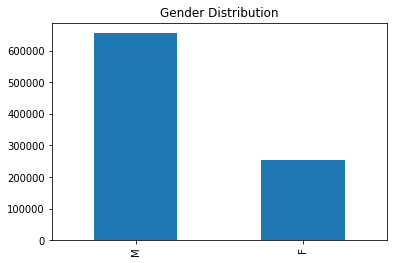

In [60]:
df_all_data['Gender'].value_counts().plot.bar()
plt.title('Gender Distribution')

#### Looks like the Male population is more than female population in our data

Text(0.5, 1.0, 'Age Distribution')

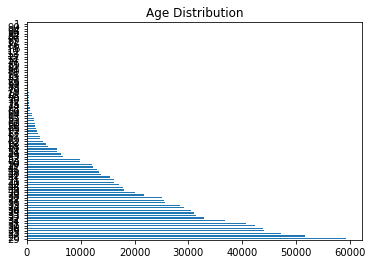

In [61]:
figsize=(250, 125)
df_all_data['Age'].value_counts().plot.barh()
plt.title('Age Distribution')

#### From above we can see that we have less people as age increases. There are more people with lower age which makes sense as people who are young use mobile more than people who are old

Text(0.5, 1.0, 'Group Distribution')

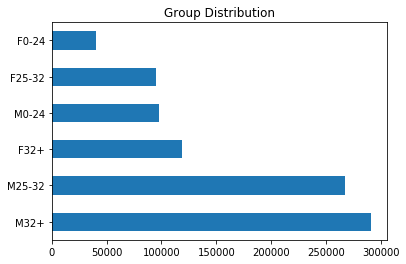

In [62]:
figsize=(250, 125)
df_all_data['Group'].value_counts().plot.barh()
plt.title('Group Distribution')

#### We can also see that Male with age 32 and above are the highest followed by Male between 25 and 32

#### 2) Boxplot analysis for gender and age [bivariate].

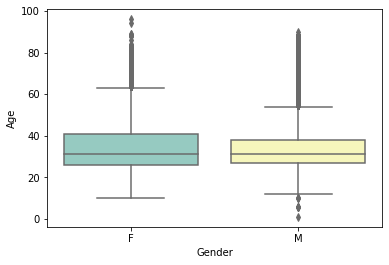

In [63]:
sns.boxplot(x="Gender", y="Age",
                 data=df_all_data, palette="Set3")
figsize =(60,30)

#### From above plot we can say that the age range for male is less whereas females are across a wider range. The mean though is same for both male and female and there is no one above 40

#### 3) Plot the percentage of the device_ids with and without event data. 


In [64]:
#!pip install missingno

In [65]:
# We import a library which can be used to plot missing values
import missingno as msno

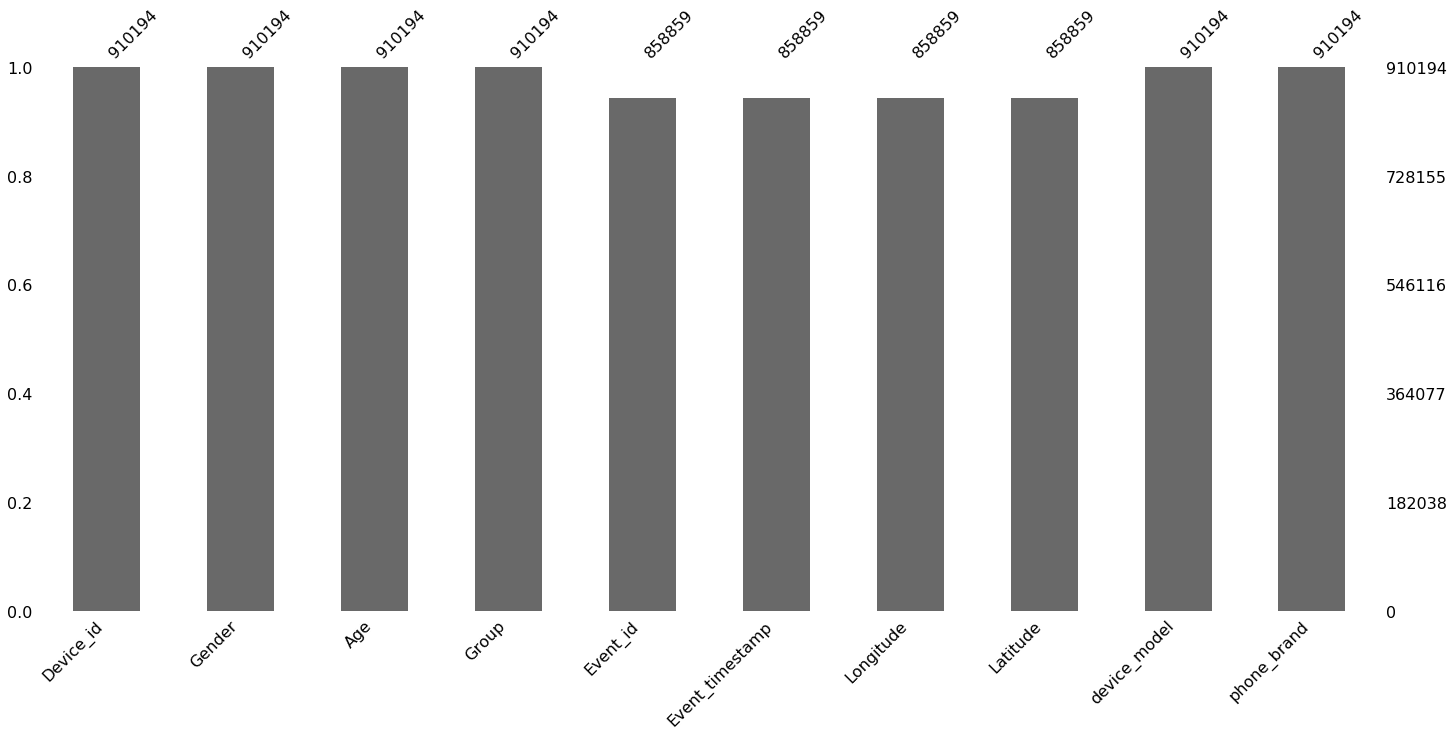

In [66]:
msno.bar(df_all_data)

#### We have just reused the same result we got above for the count of NaN in event_id. 4% of the device_id does not contain events and remaining 96% contains events. You can also see missing values of all other columns here

#### 4) Plot a graph representing the distribution of events over different days of a week. 

In [67]:
df_event['Day of Week'] = df_event['Event_timestamp'].dt.day_name()

In [68]:
df_event['Hour of day'] = df_event['Event_timestamp'].dt.hour

In [69]:
df_event

,Device_id,Gender,Age,Group,event_id,Event_timestamp,Longitude,Latitude,Day of Week,Hour of day
3,-1001337759327040000,M,30,M25-32,2774404,2016-05-07 09:14:24,119.61,29.70,Saturday,9
4,-1001337759327040000,M,30,M25-32,3065018,2016-05-04 10:26:14,120.29,30.42,Wednesday,10
5,-1001337759327040000,M,30,M25-32,3230344,2016-05-04 10:04:42,120.30,30.41,Wednesday,10
6,-1001337759327040000,M,30,M25-32,2906128,2016-05-07 10:24:32,119.69,29.80,Saturday,10
7,-1001337759327040000,M,30,M25-32,2876843,2016-05-07 10:23:56,119.69,29.80,Saturday,10
...,...,...,...,...,...,...,...,...,...,...
1266920,999208698621622000,M,29,M25-32,603552,2016-05-03 12:55:40,114.38,27.82,Tuesday,12
1266921,999208698621622000,M,29,M25-32,12506,2016-05-06 11:58:46,114.39,27.82,Friday,11
1266922,999208698621622000,M,29,M25-32,106222,2016-05-04 16:21:29,114.37,27.82,Wednesday,16
1266923,999208698621622000,M,29,M25-32,455299,2016-05-01 16:14:24,114.29,27.90,Sunday,16


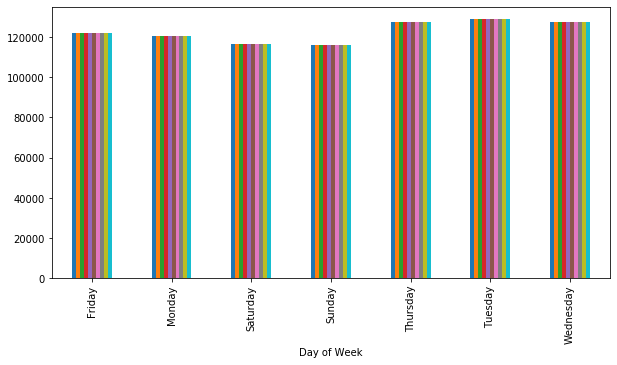

In [70]:
week_groups = df_event.groupby(df_event['Day of Week']).count()
week_groups.plot(kind='bar',figsize=(10,5),legend=None)

#### As we can see above, the events is high during mid of week Tuesday and Wednesday and low in weekends. Looks like our data has people who use the mobile more on weekdays

#### 5) Plot a graph representing the distribution of events per hour [for one-week data].

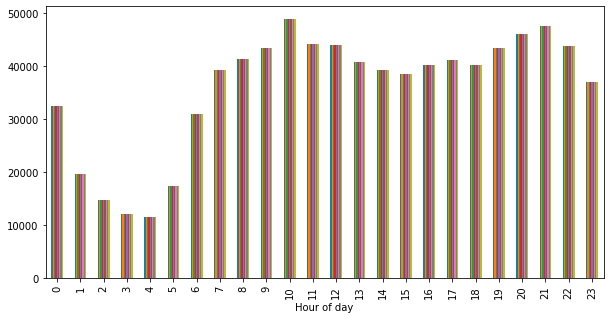

In [71]:
week_groups = df_event.groupby(df_event['Hour of day']).count()
week_groups.plot(kind='bar',figsize=(10,5),legend=None)

#### As we can see above, the events are more at highest at morning 10AM followed by night 9PM. The lowest is in early morning 4AM which makes sense that people use mobile more in start of day and end of day

#### 6) The difference in the distribution of events per hour for Male and Female consumers. [Show the difference using an appropriate chart for one-week data.]

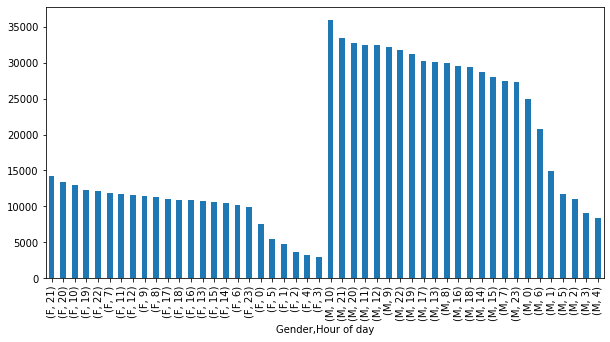

In [72]:
week_groups = df_event.groupby(["Gender"])['Hour of day'].value_counts()
week_groups.plot(kind='bar',figsize=(10,5),legend=None)

#### We can see how the events are distributed seggregated by male and female. HIghest for female is 9PM and highest for male is morning 10 AM followed by 9PM

#### 7) Is there any difference in the distribution of Events for different Age Groups over different days of the week? [Consider the following age groups: 0–24, 25–32, 33–45, and 46+]


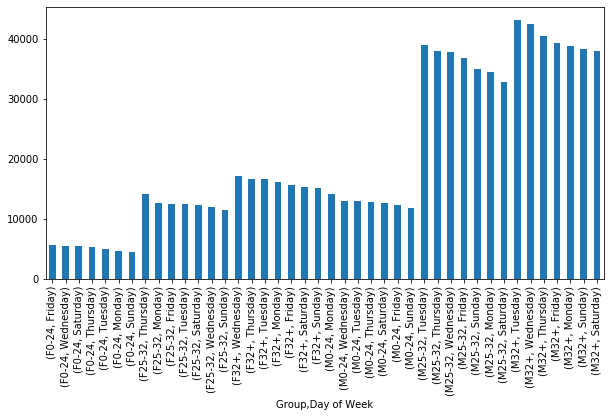

In [73]:
week_groups = df_event.groupby(["Group"])['Day of Week'].value_counts()
week_groups.plot(kind='bar',figsize=(10,5),legend=None)

#### Yes. The highest for M32+ is on Tuesday whereas for M0-24 it is Monday. Similarly the day varies for female too for each age group.

#### 8) Stacked bar chart for the top 10 mobile brands across male and female consumers.

In [74]:
# Get top 10 mobile brands first
df_top_brands = df_non_event['phone_brand'].value_counts(ascending = False)[:10].reset_index()
df_top_brands.rename(columns={'phone_brand':'count'}, inplace=True)
df_top_brands.rename(columns={'index':'phone_brand'}, inplace=True)
df_top_brands

,phone_brand,count
0,Xiaomi,17300
1,samsung,13669
2,Huawei,12960
3,OPPO,5783
4,vivo,5637
5,Meizu,4699
6,Coolpad,3339
7,lenovo,2691
8,Gionee,1123
9,HTC,1013


In [75]:
# Now we merge the dataframe to main so that all the data is related to only top 10 brands
df_top_brand_data = pd.merge(df_non_event,df_top_brands,on ='phone_brand',how ='inner')
df_top_brand_data

,Device_id,Gender,Age,Group,device_model,phone_brand,count
0,-7548291590301750000,M,33,M32+,Ã¨ÂÂ£Ã¨â¬â¬3C,Huawei,12960
1,5263633571423510000,M,27,M25-32,hu1 Plus,Huawei,12960
2,-8726733746650240000,M,40,M32+,Ã¨ÂÂ£Ã¨â¬â¬Ã§â¢â¦Ã§Å½Â©4X,Huawei,12960
3,41160829119269700,F,31,F25-32,Mate 7,Huawei,12960
4,8546919214613580000,M,34,M32+,Mate 7,Huawei,12960
...,...,...,...,...,...,...,...
68209,631247910036035000,M,19,M0-24,A2800d,lenovo,2691
68210,-3432726010690410000,F,30,F25-32,A880,lenovo,2691
68211,4572177412761050000,M,26,M25-32,s820e,lenovo,2691
68212,6237289838063050000,M,26,M25-32,A320t,lenovo,2691


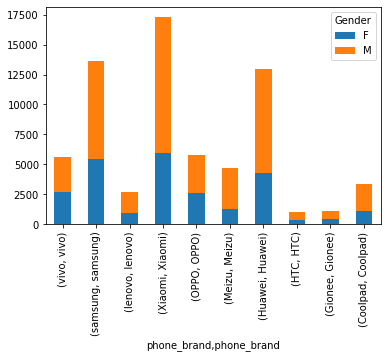

In [76]:
# Now stacking the data
df_event_stacked = df_top_brand_data.groupby(['phone_brand','Gender'])['phone_brand'].value_counts().unstack('Gender').fillna(0)
df_event_stacked.sort_index(ascending =False).plot(kind='bar', stacked=True)

#### As you can see the top brands are Xiaomi, Huawei and Samsung

#### 9) Prepare a chart representing the ten frequently used applications and their respective male and female percentage.

In [77]:
# Viewing the data
df_event_merged

,Device_id,Gender,Age,Group,event_id,Event_timestamp,Longitude,Latitude,is_installed,is_active,category
0,-1001337759327040000,M,30,M25-32,2774404,2016-05-07 09:14:24,119.61,29.70,1,1,Industry tag
1,-1001337759327040000,M,30,M25-32,2774404,2016-05-07 09:14:24,119.61,29.70,1,1,Property Industry 1.0
2,-1001337759327040000,M,30,M25-32,2774404,2016-05-07 09:14:24,119.61,29.70,1,1,Industry tag
3,-1001337759327040000,M,30,M25-32,2774404,2016-05-07 09:14:24,119.61,29.70,1,1,Property Industry 1.0
4,-1001337759327040000,M,30,M25-32,2774404,2016-05-07 09:14:24,119.61,29.70,1,1,Taxi
...,...,...,...,...,...,...,...,...,...,...,...
9871151,999208698621622000,M,29,M25-32,603552,2016-05-03 12:55:40,114.38,27.82,1,1,Industry tag
9871152,999208698621622000,M,29,M25-32,603552,2016-05-03 12:55:40,114.38,27.82,1,1,Property Industry 1.0
9871153,999208698621622000,M,29,M25-32,455299,2016-05-01 16:14:24,114.29,27.90,1,1,online malls
9871154,999208698621622000,M,29,M25-32,455299,2016-05-01 16:14:24,114.29,27.90,1,1,Property Industry 1.0


In [78]:
# First we create an dataframe for top ten apps
df_top_apps = df_event_merged['category'].value_counts(ascending = False)[:10].reset_index()
df_top_apps.rename(columns={'category':'count'}, inplace=True)
df_top_apps.rename(columns={'index':'category'}, inplace=True)
df_top_apps

,category,count
0,Industry tag,1394988
1,Property Industry 2.0,948675
2,Property Industry 1.0,895068
3,unknown,642987
4,Services 1,453733
5,Custom label,318257
6,And the Church,289404
7,Relatives 1,261333
8,Internet banking,246875
9,IM,238905


In [79]:
# Now we merge the dataframe to main so that all the data is related to only top 10 applications
df_top_app_data = pd.merge(df_event_merged,df_top_apps,on ='category',how ='inner')
df_top_app_data

,Device_id,Gender,Age,Group,event_id,Event_timestamp,Longitude,Latitude,is_installed,is_active,category,count
0,-1001337759327040000,M,30,M25-32,2774404,2016-05-07 09:14:24,119.61,29.70,1,1,Industry tag,1394988
1,-1001337759327040000,M,30,M25-32,2774404,2016-05-07 09:14:24,119.61,29.70,1,1,Industry tag,1394988
2,-1001337759327040000,M,30,M25-32,2774404,2016-05-07 09:14:24,119.61,29.70,1,1,Industry tag,1394988
3,-1001337759327040000,M,30,M25-32,2774404,2016-05-07 09:14:24,119.61,29.70,1,1,Industry tag,1394988
4,-1001337759327040000,M,30,M25-32,2774404,2016-05-07 09:14:24,119.61,29.70,1,1,Industry tag,1394988
...,...,...,...,...,...,...,...,...,...,...,...,...
5690220,998208026013018000,F,28,F25-32,2822089,2016-05-03 07:09:27,120.85,32.02,1,1,And the Church,289404
5690221,998208026013018000,F,28,F25-32,2822089,2016-05-03 07:09:27,120.85,32.02,1,1,And the Church,289404
5690222,999208698621622000,M,29,M25-32,1652207,2016-05-05 01:12:03,114.38,27.82,1,1,And the Church,289404
5690223,999208698621622000,M,29,M25-32,2275215,2016-05-04 22:40:09,114.38,27.82,1,1,And the Church,289404


In [80]:
# Calculating count first
df_gender_sum = df_top_app_data.groupby('category').agg({'Gender': 'value_counts'})
df_gender_sum.rename(columns={'Gender':'count'}, inplace=True)
df_gender_sum

count
category              Gender         
And the Church        M        224377
                      F         65027
Custom label          M        244596
                      F         73661
IM                    M        173958
                      F         64947
Industry tag          M       1038833
                      F        356155
Internet banking      M        190015
                      F         56860
Property Industry 1.0 M        664657
                      F        230411
Property Industry 2.0 M        701845
                      F        246830
Relatives 1           M        193177
                      F         68156
Services 1            M        340946
                      F        112787
unknown               M        468624
                      F        174363

In [81]:
# Now calculating percentage
df_gender_pcts = df_gender_sum.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
df_gender_pcts.rename(columns={'count':'percentage'}, inplace=True)
df_gender_pcts

percentage
category              Gender            
And the Church        M        77.530718
                      F        22.469282
Custom label          M        76.854869
                      F        23.145131
IM                    M        72.814717
                      F        27.185283
Industry tag          M        74.468956
                      F        25.531044
Internet banking      M        76.968101
                      F        23.031899
Property Industry 1.0 M        74.257710
                      F        25.742290
Property Industry 2.0 M        73.981606
                      F        26.018394
Relatives 1           M        73.919865
                      F        26.080135
Services 1            M        75.142430
                      F        24.857570
unknown               M        72.882344
                      F        27.117656

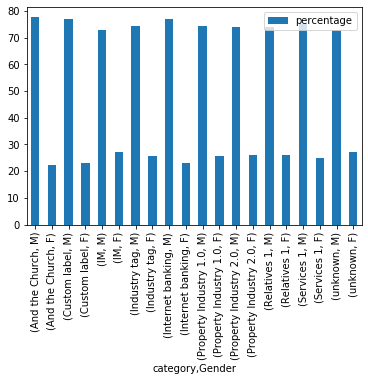

In [82]:
# Plotting above data
df_gender_pcts.plot(kind="bar")

#### We are using categories to denote frequently used applications since we don't have app name present in the dataset. We can see the male and female percentage above

#### 10) List the top 10 mobile phone brands bought by customers by age groups. [Consider the following age groups: 0–24, 25–32, 33–45, and 46+]

In [83]:
# Splitting the age groups first
df_all_data['plot_age_group'] = pd.cut(df['Age'], [0,24,32,45,46], labels=['0–24','25–32','33–45','46+'])

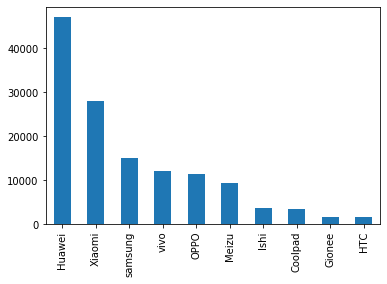

In [84]:
df_all_data[df_all_data['plot_age_group'] == '0–24']['phone_brand'].value_counts(ascending = False)[:10].plot(kind='bar')

#### Top ten brands for people in age-group 0-24 are Huawei, Xiaomi, Samsung followed by others as seen above.

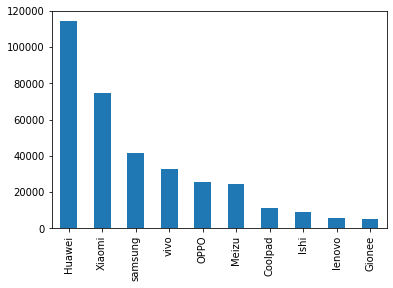

In [85]:
df_all_data[df_all_data['plot_age_group'] == '25–32']['phone_brand'].value_counts(ascending = False)[:10].plot(kind='bar')

#### Top ten brands for people in age-group 25-32 are very similar to 0-24 age group

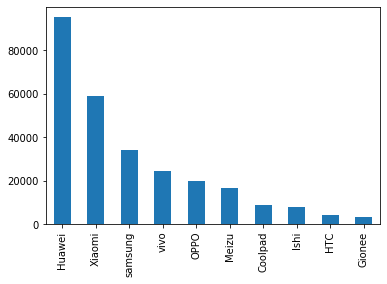

In [86]:
df_all_data[df_all_data['plot_age_group'] == '33–45']['phone_brand'].value_counts(ascending = False)[:10].plot(kind='bar')

#### Top ten brands for people in age-group 33–45 are very similar to 0-24 age group

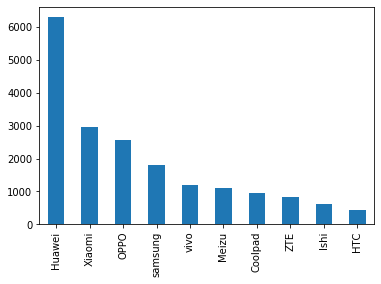

In [87]:
df_all_data[df_all_data['plot_age_group'] == '46+']['phone_brand'].value_counts(ascending = False)[:10].plot(kind='bar')

#### As you can see Oppo is 3rd in this group whereas it is 5th in 33-45 age group

## Feature Engineering tasks - doing this with df_event since merged data is too big and we can just pick necessary columns after feature engineering from here

### Feature 1: Total and average number of events/device

#### Total number of events/device_id

In [88]:
# Printing the event data first
df_event

,Device_id,Gender,Age,Group,event_id,Event_timestamp,Longitude,Latitude,Day of Week,Hour of day
3,-1001337759327040000,M,30,M25-32,2774404,2016-05-07 09:14:24,119.61,29.70,Saturday,9
4,-1001337759327040000,M,30,M25-32,3065018,2016-05-04 10:26:14,120.29,30.42,Wednesday,10
5,-1001337759327040000,M,30,M25-32,3230344,2016-05-04 10:04:42,120.30,30.41,Wednesday,10
6,-1001337759327040000,M,30,M25-32,2906128,2016-05-07 10:24:32,119.69,29.80,Saturday,10
7,-1001337759327040000,M,30,M25-32,2876843,2016-05-07 10:23:56,119.69,29.80,Saturday,10
...,...,...,...,...,...,...,...,...,...,...
1266920,999208698621622000,M,29,M25-32,603552,2016-05-03 12:55:40,114.38,27.82,Tuesday,12
1266921,999208698621622000,M,29,M25-32,12506,2016-05-06 11:58:46,114.39,27.82,Friday,11
1266922,999208698621622000,M,29,M25-32,106222,2016-05-04 16:21:29,114.37,27.82,Wednesday,16
1266923,999208698621622000,M,29,M25-32,455299,2016-05-01 16:14:24,114.29,27.90,Sunday,16


In [89]:
# Create new dataframe to denote the total number of events/device_id
df_event_count = df_event.groupby('Device_id')['event_id'].nunique()
df_event_count

Device_id
-9222956879900150000     52
-9221026417907250000    132
-9220061629197650000     39
-9218769147970100000     17
-9215352913819630000     18
                       ... 
 9215085115859650000     17
 9216925254504440000     73
 9219164468944550000    407
 9219842210460030000      4
 9220914901466450000      3
Name: event_id, Length: 11937, dtype: int64

In [90]:
# Merging both dataframes
df_event = pd.merge(df_event,df_event_count,on ='Device_id',how ='inner')

In [91]:
df_event

,Device_id,Gender,Age,Group,event_id_x,Event_timestamp,Longitude,Latitude,Day of Week,Hour of day,event_id_y
0,-1001337759327040000,M,30,M25-32,2774404,2016-05-07 09:14:24,119.61,29.70,Saturday,9,109
1,-1001337759327040000,M,30,M25-32,3065018,2016-05-04 10:26:14,120.29,30.42,Wednesday,10,109
2,-1001337759327040000,M,30,M25-32,3230344,2016-05-04 10:04:42,120.30,30.41,Wednesday,10,109
3,-1001337759327040000,M,30,M25-32,2906128,2016-05-07 10:24:32,119.69,29.80,Saturday,10,109
4,-1001337759327040000,M,30,M25-32,2876843,2016-05-07 10:23:56,119.69,29.80,Saturday,10,109
...,...,...,...,...,...,...,...,...,...,...,...
858854,999208698621622000,M,29,M25-32,603552,2016-05-03 12:55:40,114.38,27.82,Tuesday,12,35
858855,999208698621622000,M,29,M25-32,12506,2016-05-06 11:58:46,114.39,27.82,Friday,11,35
858856,999208698621622000,M,29,M25-32,106222,2016-05-04 16:21:29,114.37,27.82,Wednesday,16,35
858857,999208698621622000,M,29,M25-32,455299,2016-05-01 16:14:24,114.29,27.90,Sunday,16,35


In [92]:
# Renaming columns
df_event.rename(columns={'event_id_x':'Event_id'}, inplace=True)
df_event

,Device_id,Gender,Age,Group,Event_id,Event_timestamp,Longitude,Latitude,Day of Week,Hour of day,event_id_y
0,-1001337759327040000,M,30,M25-32,2774404,2016-05-07 09:14:24,119.61,29.70,Saturday,9,109
1,-1001337759327040000,M,30,M25-32,3065018,2016-05-04 10:26:14,120.29,30.42,Wednesday,10,109
2,-1001337759327040000,M,30,M25-32,3230344,2016-05-04 10:04:42,120.30,30.41,Wednesday,10,109
3,-1001337759327040000,M,30,M25-32,2906128,2016-05-07 10:24:32,119.69,29.80,Saturday,10,109
4,-1001337759327040000,M,30,M25-32,2876843,2016-05-07 10:23:56,119.69,29.80,Saturday,10,109
...,...,...,...,...,...,...,...,...,...,...,...
858854,999208698621622000,M,29,M25-32,603552,2016-05-03 12:55:40,114.38,27.82,Tuesday,12,35
858855,999208698621622000,M,29,M25-32,12506,2016-05-06 11:58:46,114.39,27.82,Friday,11,35
858856,999208698621622000,M,29,M25-32,106222,2016-05-04 16:21:29,114.37,27.82,Wednesday,16,35
858857,999208698621622000,M,29,M25-32,455299,2016-05-01 16:14:24,114.29,27.90,Sunday,16,35


In [93]:
# Renaming columns
df_event.rename(columns={'event_id_y':'Total_events'}, inplace=True)
df_event

,Device_id,Gender,Age,Group,Event_id,Event_timestamp,Longitude,Latitude,Day of Week,Hour of day,Total_events
0,-1001337759327040000,M,30,M25-32,2774404,2016-05-07 09:14:24,119.61,29.70,Saturday,9,109
1,-1001337759327040000,M,30,M25-32,3065018,2016-05-04 10:26:14,120.29,30.42,Wednesday,10,109
2,-1001337759327040000,M,30,M25-32,3230344,2016-05-04 10:04:42,120.30,30.41,Wednesday,10,109
3,-1001337759327040000,M,30,M25-32,2906128,2016-05-07 10:24:32,119.69,29.80,Saturday,10,109
4,-1001337759327040000,M,30,M25-32,2876843,2016-05-07 10:23:56,119.69,29.80,Saturday,10,109
...,...,...,...,...,...,...,...,...,...,...,...
858854,999208698621622000,M,29,M25-32,603552,2016-05-03 12:55:40,114.38,27.82,Tuesday,12,35
858855,999208698621622000,M,29,M25-32,12506,2016-05-06 11:58:46,114.39,27.82,Friday,11,35
858856,999208698621622000,M,29,M25-32,106222,2016-05-04 16:21:29,114.37,27.82,Wednesday,16,35
858857,999208698621622000,M,29,M25-32,455299,2016-05-01 16:14:24,114.29,27.90,Sunday,16,35


#### Average number of events/day

In [94]:
# First let us get the date from timestamp
df_event['Event_date'] = df_event['Event_timestamp'].dt.date
df_event

,Device_id,Gender,Age,Group,Event_id,Event_timestamp,Longitude,Latitude,Day of Week,Hour of day,Total_events,Event_date
0,-1001337759327040000,M,30,M25-32,2774404,2016-05-07 09:14:24,119.61,29.70,Saturday,9,109,2016-05-07
1,-1001337759327040000,M,30,M25-32,3065018,2016-05-04 10:26:14,120.29,30.42,Wednesday,10,109,2016-05-04
2,-1001337759327040000,M,30,M25-32,3230344,2016-05-04 10:04:42,120.30,30.41,Wednesday,10,109,2016-05-04
3,-1001337759327040000,M,30,M25-32,2906128,2016-05-07 10:24:32,119.69,29.80,Saturday,10,109,2016-05-07
4,-1001337759327040000,M,30,M25-32,2876843,2016-05-07 10:23:56,119.69,29.80,Saturday,10,109,2016-05-07
...,...,...,...,...,...,...,...,...,...,...,...,...
858854,999208698621622000,M,29,M25-32,603552,2016-05-03 12:55:40,114.38,27.82,Tuesday,12,35,2016-05-03
858855,999208698621622000,M,29,M25-32,12506,2016-05-06 11:58:46,114.39,27.82,Friday,11,35,2016-05-06
858856,999208698621622000,M,29,M25-32,106222,2016-05-04 16:21:29,114.37,27.82,Wednesday,16,35,2016-05-04
858857,999208698621622000,M,29,M25-32,455299,2016-05-01 16:14:24,114.29,27.90,Sunday,16,35,2016-05-01


In [95]:

# To calculate average number of events/day = Total events for device/Total number of days the device was active
df_active_days = df_event.groupby('Device_id')['Event_date'].nunique()
df_active_days

Device_id
-9222956879900150000    2
-9221026417907250000    7
-9220061629197650000    5
-9218769147970100000    1
-9215352913819630000    1
                       ..
 9215085115859650000    3
 9216925254504440000    3
 9219164468944550000    7
 9219842210460030000    1
 9220914901466450000    2
Name: Event_date, Length: 11937, dtype: int64

In [96]:
# Merging both dataframes
df_event = pd.merge(df_event,df_active_days,on ='Device_id',how ='inner')
df_event

,Device_id,Gender,Age,Group,Event_id,Event_timestamp,Longitude,Latitude,Day of Week,Hour of day,Total_events,Event_date_x,Event_date_y
0,-1001337759327040000,M,30,M25-32,2774404,2016-05-07 09:14:24,119.61,29.70,Saturday,9,109,2016-05-07,4
1,-1001337759327040000,M,30,M25-32,3065018,2016-05-04 10:26:14,120.29,30.42,Wednesday,10,109,2016-05-04,4
2,-1001337759327040000,M,30,M25-32,3230344,2016-05-04 10:04:42,120.30,30.41,Wednesday,10,109,2016-05-04,4
3,-1001337759327040000,M,30,M25-32,2906128,2016-05-07 10:24:32,119.69,29.80,Saturday,10,109,2016-05-07,4
4,-1001337759327040000,M,30,M25-32,2876843,2016-05-07 10:23:56,119.69,29.80,Saturday,10,109,2016-05-07,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
858854,999208698621622000,M,29,M25-32,603552,2016-05-03 12:55:40,114.38,27.82,Tuesday,12,35,2016-05-03,7
858855,999208698621622000,M,29,M25-32,12506,2016-05-06 11:58:46,114.39,27.82,Friday,11,35,2016-05-06,7
858856,999208698621622000,M,29,M25-32,106222,2016-05-04 16:21:29,114.37,27.82,Wednesday,16,35,2016-05-04,7
858857,999208698621622000,M,29,M25-32,455299,2016-05-01 16:14:24,114.29,27.90,Sunday,16,35,2016-05-01,7


In [97]:
# Renaming and dropping columns we don't need
df_event.rename(columns={'Event_date_y':'Total_days'}, inplace=True)
df_event

,Device_id,Gender,Age,Group,Event_id,Event_timestamp,Longitude,Latitude,Day of Week,Hour of day,Total_events,Event_date_x,Total_days
0,-1001337759327040000,M,30,M25-32,2774404,2016-05-07 09:14:24,119.61,29.70,Saturday,9,109,2016-05-07,4
1,-1001337759327040000,M,30,M25-32,3065018,2016-05-04 10:26:14,120.29,30.42,Wednesday,10,109,2016-05-04,4
2,-1001337759327040000,M,30,M25-32,3230344,2016-05-04 10:04:42,120.30,30.41,Wednesday,10,109,2016-05-04,4
3,-1001337759327040000,M,30,M25-32,2906128,2016-05-07 10:24:32,119.69,29.80,Saturday,10,109,2016-05-07,4
4,-1001337759327040000,M,30,M25-32,2876843,2016-05-07 10:23:56,119.69,29.80,Saturday,10,109,2016-05-07,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
858854,999208698621622000,M,29,M25-32,603552,2016-05-03 12:55:40,114.38,27.82,Tuesday,12,35,2016-05-03,7
858855,999208698621622000,M,29,M25-32,12506,2016-05-06 11:58:46,114.39,27.82,Friday,11,35,2016-05-06,7
858856,999208698621622000,M,29,M25-32,106222,2016-05-04 16:21:29,114.37,27.82,Wednesday,16,35,2016-05-04,7
858857,999208698621622000,M,29,M25-32,455299,2016-05-01 16:14:24,114.29,27.90,Sunday,16,35,2016-05-01,7


In [98]:
df_event.drop('Event_date_x', axis='columns', inplace=True)
df_event

,Device_id,Gender,Age,Group,Event_id,Event_timestamp,Longitude,Latitude,Day of Week,Hour of day,Total_events,Total_days
0,-1001337759327040000,M,30,M25-32,2774404,2016-05-07 09:14:24,119.61,29.70,Saturday,9,109,4
1,-1001337759327040000,M,30,M25-32,3065018,2016-05-04 10:26:14,120.29,30.42,Wednesday,10,109,4
2,-1001337759327040000,M,30,M25-32,3230344,2016-05-04 10:04:42,120.30,30.41,Wednesday,10,109,4
3,-1001337759327040000,M,30,M25-32,2906128,2016-05-07 10:24:32,119.69,29.80,Saturday,10,109,4
4,-1001337759327040000,M,30,M25-32,2876843,2016-05-07 10:23:56,119.69,29.80,Saturday,10,109,4
...,...,...,...,...,...,...,...,...,...,...,...,...
858854,999208698621622000,M,29,M25-32,603552,2016-05-03 12:55:40,114.38,27.82,Tuesday,12,35,7
858855,999208698621622000,M,29,M25-32,12506,2016-05-06 11:58:46,114.39,27.82,Friday,11,35,7
858856,999208698621622000,M,29,M25-32,106222,2016-05-04 16:21:29,114.37,27.82,Wednesday,16,35,7
858857,999208698621622000,M,29,M25-32,455299,2016-05-01 16:14:24,114.29,27.90,Sunday,16,35,7


In [99]:
# Creating new column for average events/day
df_event['Avg_events'] = df_event['Total_events']/df_event['Total_days']
df_event.drop('Total_days', axis='columns', inplace=True)
df_event

,Device_id,Gender,Age,Group,Event_id,Event_timestamp,Longitude,Latitude,Day of Week,Hour of day,Total_events,Avg_events
0,-1001337759327040000,M,30,M25-32,2774404,2016-05-07 09:14:24,119.61,29.70,Saturday,9,109,27.25
1,-1001337759327040000,M,30,M25-32,3065018,2016-05-04 10:26:14,120.29,30.42,Wednesday,10,109,27.25
2,-1001337759327040000,M,30,M25-32,3230344,2016-05-04 10:04:42,120.30,30.41,Wednesday,10,109,27.25
3,-1001337759327040000,M,30,M25-32,2906128,2016-05-07 10:24:32,119.69,29.80,Saturday,10,109,27.25
4,-1001337759327040000,M,30,M25-32,2876843,2016-05-07 10:23:56,119.69,29.80,Saturday,10,109,27.25
...,...,...,...,...,...,...,...,...,...,...,...,...
858854,999208698621622000,M,29,M25-32,603552,2016-05-03 12:55:40,114.38,27.82,Tuesday,12,35,5.00
858855,999208698621622000,M,29,M25-32,12506,2016-05-06 11:58:46,114.39,27.82,Friday,11,35,5.00
858856,999208698621622000,M,29,M25-32,106222,2016-05-04 16:21:29,114.37,27.82,Wednesday,16,35,5.00
858857,999208698621622000,M,29,M25-32,455299,2016-05-01 16:14:24,114.29,27.90,Sunday,16,35,5.00


#### Now we have both total number of events/device and average number of events/device

### Feature 2: Most active hour of the device

In [100]:
# First let us get the active hour for each device_id
df_active_hour = df_event.groupby(['Device_id','Hour of day'])['Event_id'].count().sort_values().groupby(level=0).tail(1).reset_index()
df_active_hour

,Device_id,Hour of day,Event_id
0,2921246202195210000,16,1
1,-5316377295367510000,16,1
2,2887103439295940000,20,1
3,2939612161634090000,16,1
4,2940655378133420000,17,1
...,...,...,...
11932,3724654925765150000,19,336
11933,-8340098378141150000,22,380
11934,1779631023439400000,7,453
11935,1522573667677180000,0,460


In [101]:
# Renaming and dropping unnecessary columns before merging so that there is no issue when merging
df_active_hour.rename(columns={'Hour of day':'Active Hour'}, inplace=True)
df_active_hour.drop('Event_id', axis='columns', inplace=True)
df_active_hour

,Device_id,Active Hour
0,2921246202195210000,16
1,-5316377295367510000,16
2,2887103439295940000,20
3,2939612161634090000,16
4,2940655378133420000,17
...,...,...
11932,3724654925765150000,19
11933,-8340098378141150000,22
11934,1779631023439400000,7
11935,1522573667677180000,0


In [102]:
# Merging both dataframes
df_event = pd.merge(df_event,df_active_hour,on ='Device_id',how ='inner')
df_event

,Device_id,Gender,Age,Group,Event_id,Event_timestamp,Longitude,Latitude,Day of Week,Hour of day,Total_events,Avg_events,Active Hour
0,-1001337759327040000,M,30,M25-32,2774404,2016-05-07 09:14:24,119.61,29.70,Saturday,9,109,27.25,10
1,-1001337759327040000,M,30,M25-32,3065018,2016-05-04 10:26:14,120.29,30.42,Wednesday,10,109,27.25,10
2,-1001337759327040000,M,30,M25-32,3230344,2016-05-04 10:04:42,120.30,30.41,Wednesday,10,109,27.25,10
3,-1001337759327040000,M,30,M25-32,2906128,2016-05-07 10:24:32,119.69,29.80,Saturday,10,109,27.25,10
4,-1001337759327040000,M,30,M25-32,2876843,2016-05-07 10:23:56,119.69,29.80,Saturday,10,109,27.25,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
858854,999208698621622000,M,29,M25-32,603552,2016-05-03 12:55:40,114.38,27.82,Tuesday,12,35,5.00,16
858855,999208698621622000,M,29,M25-32,12506,2016-05-06 11:58:46,114.39,27.82,Friday,11,35,5.00,16
858856,999208698621622000,M,29,M25-32,106222,2016-05-04 16:21:29,114.37,27.82,Wednesday,16,35,5.00,16
858857,999208698621622000,M,29,M25-32,455299,2016-05-01 16:14:24,114.29,27.90,Sunday,16,35,5.00,16


#### As you can see above we have captured the most active hour for each device

### Feature 3: Total number of places visited by device

In [103]:
# First lets take a look at lat, long data
df_event[['Device_id','Latitude','Longitude']]

,Device_id,Latitude,Longitude
0,-1001337759327040000,29.70,119.61
1,-1001337759327040000,30.42,120.29
2,-1001337759327040000,30.41,120.30
3,-1001337759327040000,29.80,119.69
4,-1001337759327040000,29.80,119.69
...,...,...,...
858854,999208698621622000,27.82,114.38
858855,999208698621622000,27.82,114.39
858856,999208698621622000,27.82,114.37
858857,999208698621622000,27.90,114.29


#### Though there are values with very slight variation in decimal places, it actually amounts to difference in 1KM (ref: http://wiki.gis.com/wiki/index.php/Decimal_degrees). So lets consider them too.

In [104]:
# Creating a comibined column for latitude and longitude as only together they represent a location
df_event["long_lat"] = df_event["Longitude"].astype(str) + df_event["Latitude"].astype(str)
df_event

,Device_id,Gender,Age,Group,Event_id,Event_timestamp,Longitude,Latitude,Day of Week,Hour of day,Total_events,Avg_events,Active Hour,long_lat
0,-1001337759327040000,M,30,M25-32,2774404,2016-05-07 09:14:24,119.61,29.70,Saturday,9,109,27.25,10,119.6129.7
1,-1001337759327040000,M,30,M25-32,3065018,2016-05-04 10:26:14,120.29,30.42,Wednesday,10,109,27.25,10,120.2930.42
2,-1001337759327040000,M,30,M25-32,3230344,2016-05-04 10:04:42,120.30,30.41,Wednesday,10,109,27.25,10,120.330.41
3,-1001337759327040000,M,30,M25-32,2906128,2016-05-07 10:24:32,119.69,29.80,Saturday,10,109,27.25,10,119.6929.8
4,-1001337759327040000,M,30,M25-32,2876843,2016-05-07 10:23:56,119.69,29.80,Saturday,10,109,27.25,10,119.6929.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858854,999208698621622000,M,29,M25-32,603552,2016-05-03 12:55:40,114.38,27.82,Tuesday,12,35,5.00,16,114.3827.82
858855,999208698621622000,M,29,M25-32,12506,2016-05-06 11:58:46,114.39,27.82,Friday,11,35,5.00,16,114.3927.82
858856,999208698621622000,M,29,M25-32,106222,2016-05-04 16:21:29,114.37,27.82,Wednesday,16,35,5.00,16,114.3727.82
858857,999208698621622000,M,29,M25-32,455299,2016-05-01 16:14:24,114.29,27.90,Sunday,16,35,5.00,16,114.2927.9


In [105]:
# Now lets calculate the number of unique values for each device_id
df_dev_places_count = df_event.groupby('Device_id')['long_lat'].nunique().reset_index()
df_dev_places_count

,Device_id,long_lat
0,-9222956879900150000,1
1,-9221026417907250000,4
2,-9220061629197650000,11
3,-9218769147970100000,2
4,-9215352913819630000,1
...,...,...
11932,9215085115859650000,1
11933,9216925254504440000,3
11934,9219164468944550000,16
11935,9219842210460030000,2


In [106]:
# Now merging the dataframes
df_event = pd.merge(df_event,df_dev_places_count,on ='Device_id',how ='inner')
df_event

,Device_id,Gender,Age,Group,Event_id,Event_timestamp,Longitude,Latitude,Day of Week,Hour of day,Total_events,Avg_events,Active Hour,long_lat_x,long_lat_y
0,-1001337759327040000,M,30,M25-32,2774404,2016-05-07 09:14:24,119.61,29.70,Saturday,9,109,27.25,10,119.6129.7,21
1,-1001337759327040000,M,30,M25-32,3065018,2016-05-04 10:26:14,120.29,30.42,Wednesday,10,109,27.25,10,120.2930.42,21
2,-1001337759327040000,M,30,M25-32,3230344,2016-05-04 10:04:42,120.30,30.41,Wednesday,10,109,27.25,10,120.330.41,21
3,-1001337759327040000,M,30,M25-32,2906128,2016-05-07 10:24:32,119.69,29.80,Saturday,10,109,27.25,10,119.6929.8,21
4,-1001337759327040000,M,30,M25-32,2876843,2016-05-07 10:23:56,119.69,29.80,Saturday,10,109,27.25,10,119.6929.8,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858854,999208698621622000,M,29,M25-32,603552,2016-05-03 12:55:40,114.38,27.82,Tuesday,12,35,5.00,16,114.3827.82,4
858855,999208698621622000,M,29,M25-32,12506,2016-05-06 11:58:46,114.39,27.82,Friday,11,35,5.00,16,114.3927.82,4
858856,999208698621622000,M,29,M25-32,106222,2016-05-04 16:21:29,114.37,27.82,Wednesday,16,35,5.00,16,114.3727.82,4
858857,999208698621622000,M,29,M25-32,455299,2016-05-01 16:14:24,114.29,27.90,Sunday,16,35,5.00,16,114.2927.9,4


In [107]:
# Dropping unnecessary columns and renaming
df_event.drop('long_lat_x', axis='columns', inplace=True)
df_event.rename(columns={'long_lat_y':'Total_places_visited'}, inplace=True)
df_event

,Device_id,Gender,Age,Group,Event_id,Event_timestamp,Longitude,Latitude,Day of Week,Hour of day,Total_events,Avg_events,Active Hour,Total_places_visited
0,-1001337759327040000,M,30,M25-32,2774404,2016-05-07 09:14:24,119.61,29.70,Saturday,9,109,27.25,10,21
1,-1001337759327040000,M,30,M25-32,3065018,2016-05-04 10:26:14,120.29,30.42,Wednesday,10,109,27.25,10,21
2,-1001337759327040000,M,30,M25-32,3230344,2016-05-04 10:04:42,120.30,30.41,Wednesday,10,109,27.25,10,21
3,-1001337759327040000,M,30,M25-32,2906128,2016-05-07 10:24:32,119.69,29.80,Saturday,10,109,27.25,10,21
4,-1001337759327040000,M,30,M25-32,2876843,2016-05-07 10:23:56,119.69,29.80,Saturday,10,109,27.25,10,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858854,999208698621622000,M,29,M25-32,603552,2016-05-03 12:55:40,114.38,27.82,Tuesday,12,35,5.00,16,4
858855,999208698621622000,M,29,M25-32,12506,2016-05-06 11:58:46,114.39,27.82,Friday,11,35,5.00,16,4
858856,999208698621622000,M,29,M25-32,106222,2016-05-04 16:21:29,114.37,27.82,Wednesday,16,35,5.00,16,4
858857,999208698621622000,M,29,M25-32,455299,2016-05-01 16:14:24,114.29,27.90,Sunday,16,35,5.00,16,4


In [108]:
# Dropping other meta columns not needed for Model building
df_event.drop(['Day of Week','Hour of day'],axis=1,inplace=True)
df_event.dtypes

Device_id                        int64
Gender                          object
Age                              int64
Group                           object
Event_id                         int64
Event_timestamp         datetime64[ns]
Longitude                      float64
Latitude                       float64
Total_events                     int64
Avg_events                     float64
Active Hour                      int64
Total_places_visited             int64
dtype: object

#### Though we have df_event_merged it is causing memory issue when merged with new columns in df_event. So let us merge the app_data instead again with df_event

In [109]:
# Checking app_data
df_app_data

,event_id,is_installed,is_active,category
0,3162680,1,1,Casual puzzle categories
1,3162680,1,1,Property Industry 2.0
2,3162680,1,1,Industry tag
3,3162680,1,1,game-Puzzle
4,3162680,1,1,Custom label
...,...,...,...,...
71376430,3009011,1,1,reading platform
71376431,3009011,1,1,pursue
71376432,3009011,1,1,Property Industry new
71376433,229470,1,1,dictionary


In [110]:
df_app_data.dtypes

event_id         int64
is_installed     int64
is_active        int64
category        object
dtype: object

In [111]:
# Renaming common column and merging
df_event.rename(columns={'Event_id':'event_id'}, inplace=True)
df_event_merged = pd.merge(df_event,df_app_data,on ='event_id',how ='inner')

In [112]:
df_event_merged

,Device_id,Gender,Age,Group,event_id,Event_timestamp,Longitude,Latitude,Total_events,Avg_events,Active Hour,Total_places_visited,is_installed,is_active,category
0,-1001337759327040000,M,30,M25-32,2774404,2016-05-07 09:14:24,119.61,29.70,109,27.25,10,21,1,1,Industry tag
1,-1001337759327040000,M,30,M25-32,2774404,2016-05-07 09:14:24,119.61,29.70,109,27.25,10,21,1,1,Property Industry 1.0
2,-1001337759327040000,M,30,M25-32,2774404,2016-05-07 09:14:24,119.61,29.70,109,27.25,10,21,1,1,Industry tag
3,-1001337759327040000,M,30,M25-32,2774404,2016-05-07 09:14:24,119.61,29.70,109,27.25,10,21,1,1,Property Industry 1.0
4,-1001337759327040000,M,30,M25-32,2774404,2016-05-07 09:14:24,119.61,29.70,109,27.25,10,21,1,1,Taxi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9871151,999208698621622000,M,29,M25-32,603552,2016-05-03 12:55:40,114.38,27.82,35,5.00,16,4,1,1,Industry tag
9871152,999208698621622000,M,29,M25-32,603552,2016-05-03 12:55:40,114.38,27.82,35,5.00,16,4,1,1,Property Industry 1.0
9871153,999208698621622000,M,29,M25-32,455299,2016-05-01 16:14:24,114.29,27.90,35,5.00,16,4,1,1,online malls
9871154,999208698621622000,M,29,M25-32,455299,2016-05-01 16:14:24,114.29,27.90,35,5.00,16,4,1,1,Property Industry 1.0


### Feature 4: Generalisation of category

In [113]:
df_industry = df_event_merged[(df_event_merged.category == 'Industry tag')|(df_event_merged.category == 'Property Industry 2.0')|(df_event_merged.category == 'Property Industry 1.0')]
df_industry

,Device_id,Gender,Age,Group,event_id,Event_timestamp,Longitude,Latitude,Total_events,Avg_events,Active Hour,Total_places_visited,is_installed,is_active,category
0,-1001337759327040000,M,30,M25-32,2774404,2016-05-07 09:14:24,119.61,29.70,109,27.25,10,21,1,1,Industry tag
1,-1001337759327040000,M,30,M25-32,2774404,2016-05-07 09:14:24,119.61,29.70,109,27.25,10,21,1,1,Property Industry 1.0
2,-1001337759327040000,M,30,M25-32,2774404,2016-05-07 09:14:24,119.61,29.70,109,27.25,10,21,1,1,Industry tag
3,-1001337759327040000,M,30,M25-32,2774404,2016-05-07 09:14:24,119.61,29.70,109,27.25,10,21,1,1,Property Industry 1.0
5,-1001337759327040000,M,30,M25-32,2774404,2016-05-07 09:14:24,119.61,29.70,109,27.25,10,21,1,1,Property Industry 1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9871148,999208698621622000,M,29,M25-32,603552,2016-05-03 12:55:40,114.38,27.82,35,5.00,16,4,1,1,Property Industry 2.0
9871151,999208698621622000,M,29,M25-32,603552,2016-05-03 12:55:40,114.38,27.82,35,5.00,16,4,1,1,Industry tag
9871152,999208698621622000,M,29,M25-32,603552,2016-05-03 12:55:40,114.38,27.82,35,5.00,16,4,1,1,Property Industry 1.0
9871154,999208698621622000,M,29,M25-32,455299,2016-05-01 16:14:24,114.29,27.90,35,5.00,16,4,1,1,Property Industry 1.0


In [114]:
df_industry.groupby('Gender').count()

,Device_id,Age,Group,event_id,Event_timestamp,Longitude,Latitude,Total_events,Avg_events,Active Hour,Total_places_visited,is_installed,is_active,category
Gender,,,,,,,,,,,,,,
F,833396,833396,833396,833396,833396,833396,833396,833396,833396,833396,833396,833396,833396,833396
M,2405335,2405335,2405335,2405335,2405335,2405335,2405335,2405335,2405335,2405335,2405335,2405335,2405335,2405335


#### Since the initial categories are distributed between male and female, let's take a look at all the categories available 

In [115]:
# Checking category column
pd.set_option('display.max_rows', None)
df_event_merged['category'].value_counts()

Industry tag                         1394988
Property Industry 2.0                 948675
Property Industry 1.0                 895068
unknown                               642987
Services 1                            453733
Custom label                          318257
And the Church                        289404
Relatives 1                           261333
Internet banking                      246875
IM                                    238905
Finance                               225674
Pay                                   167158
P2P                                   161642
Low risk                              141188
P2P net loan                          135791
Liquid medium                         135172
1 free                                125336
Wealth Management                     113656
Debit and credit                      109802
High risk                             104025
Personal Effectiveness 1              103349
online malls                           99377
High Flow 

In [116]:
# Let us try to create a parent heirarchy for these categories
# We are focussing mainly on categories having 10K+ data since the dataset is huge
def category_heirarchy (row):
    industry_list = ['Industry tag','Property Industry 2.0','Property Industry 1.0']
    loan_list = ['P2P','P2P net loan','Property Industry 1.0','DS_P2P net loan','Consumer loans']
    low_list = ['Low risk','Low income','Low liquidity','Low profitability']
    high_list = ['High risk','High Flow','Higher income']
    finance_list = ['Finance','Pay','Wealth Management','Debit and credit','Direct Bank','Internet Banking','Financial Services','Consumer Finance',
                   'Bank financing','Securities','Monetary Fund']
    serv_list = ['Services 1','convenience services']
    com_list = ['Relatives 1','community']
    mf_list = ['radio','music','fashion']
    cus_list = ['Custom label','Customized 1']
    if(row['category'] in industry_list):
      return 'Property Industry'
    if(row['category'] in loan_list):
      return 'Loans'
    if(row['category'] in low_list):
      return 'Low feature category'
    if(row['category'] in high_list):
      return 'High feature category'
    if(row['category'] in finance_list):
      return 'Finance'
    if(row['category'] in serv_list):
      return 'Services'
    if(row['category'] in com_list):
      return 'Community'
    if(row['category'] in mf_list):
      return 'Music and Fashion'
    if(row['category'] in cus_list):
      return 'Custom'
    return 'Other'

#### Since the data is huge let us split only required columns into separate dataframe

In [117]:
df_event_merged.shape

(9871156, 15)

In [118]:
df_cat = df_event_merged[['category']]
df_cat.head()

,category
0,Industry tag
1,Property Industry 1.0
2,Industry tag
3,Property Industry 1.0
4,Taxi


In [119]:
df_cat.shape

(9871156, 1)

In [120]:
#df_cat.apply(lambda row: category_heirarchy(row), axis=1)

#### Above caused a memory issue and kernel restarted. Hence stopping with 3 features

## Advanced Visualisation

In [121]:
# Source code for mpl-toolkits was downloaded from matplotlib website and then libraries are imported from the local downloads

In [122]:
#!pip install basemap

In [123]:
#!pip install Pillow

In [124]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns 
from mpl_toolkits.basemap import Basemap
%matplotlib inline

In [125]:
geo_data =df_event_merged[["Longitude","Latitude"]]

In [126]:
geo_data = geo_data.drop_duplicates()

In [127]:
geo_data.head(5)

,Longitude,Latitude
0,119.61,29.70
21,119.69,29.80
131,119.49,29.59
171,119.50,29.60
192,119.62,29.71


In [128]:
geo_data.shape

(23929, 2)

#### 1) Plot the visualisation plot for a sample of 1 lakh data points.

In [129]:
# We are using WorldMap here as to show demographics for all the data points across the world

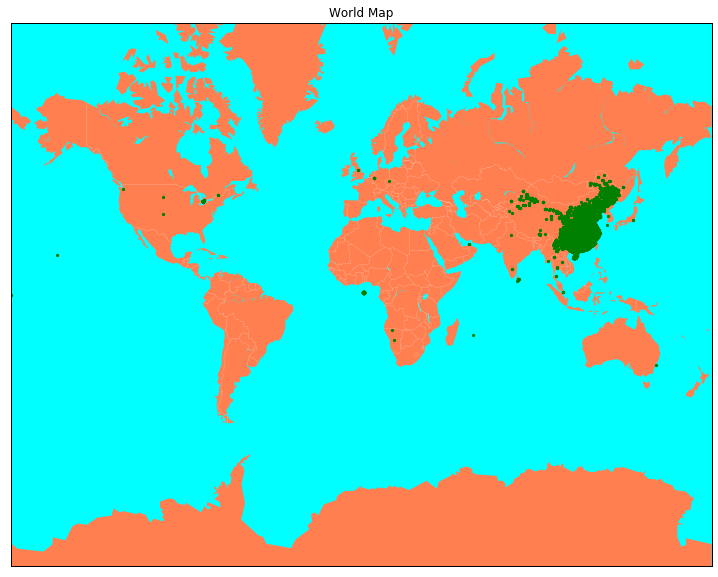

In [130]:
fig = plt.figure(figsize=(8, 8))

# Mercator of World
m = Basemap(projection='merc',
             llcrnrlat=-80,  #latitude of lower left hand corner of the desired map domain
             urcrnrlat=80, #latitude of upper right hand corner of the desired map domain
             llcrnrlon=-180, #longitude of lower left hand corner of the desired map domain
             urcrnrlon=180, #longitude of upper right hand corner of the desired map domain
             lat_ts=0, #latitude of true scale
             resolution='c') #resolution of boundary dataset being used - c for crude


m.fillcontinents(color='coral',lake_color='aqua')       # coral land, black lakes
m.drawmapboundary(fill_color='aqua')                    # Aqua background
m.drawcountries(linewidth=0.15, color="w")              # thin white line for country borders

# Plot the data
mxy = m(geo_data["Longitude"].tolist(), geo_data["Latitude"].tolist())
m.scatter(mxy[0],mxy[1], s=5, c="green", zorder=2)    # zorder for the points  

fig.set_size_inches(20,10)
plt.title("World Map")
plt.show()

In [131]:
# In the above map the green dots cluster shows sample users demographics across the world

#### 2) Compare the event visualisation plots based on the users' gender information. [This can be done on the sample of 1 lakh data points]

In [132]:
geo_data =df_all_data[["Longitude","Latitude","Gender"]]

In [133]:
geo_data.head()

,Longitude,Latitude,Gender
0,NaN,NaN,F
1,NaN,NaN,F
2,NaN,NaN,M
3,119.61,29.70,M
4,120.29,30.42,M


In [134]:
geo_data = geo_data.dropna()

In [135]:
geo_data.head()

,Longitude,Latitude,Gender
3,119.61,29.70,M
4,120.29,30.42,M
5,120.30,30.41,M
6,119.69,29.80,M
7,119.69,29.80,M


In [136]:
geo_data.dtypes

Longitude    float64
Latitude     float64
Gender        object
dtype: object

In [137]:
categorical_columns = list(geo_data.loc[:, geo_data.dtypes =="object"].columns)
categorical_columns

['Gender']

In [138]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

def MultiLabelEncoder(columnlist,dataframe):
    for i in columnlist:
        #print(i)
        labelencoder_X=LabelEncoder()
        dataframe[i]=labelencoder_X.fit_transform(dataframe[i])

MultiLabelEncoder(categorical_columns,geo_data)

In [139]:
geo_data.shape

(858859, 3)

In [140]:
#geo_data[geo_data["Gender"]==0].Longitude.tolist()

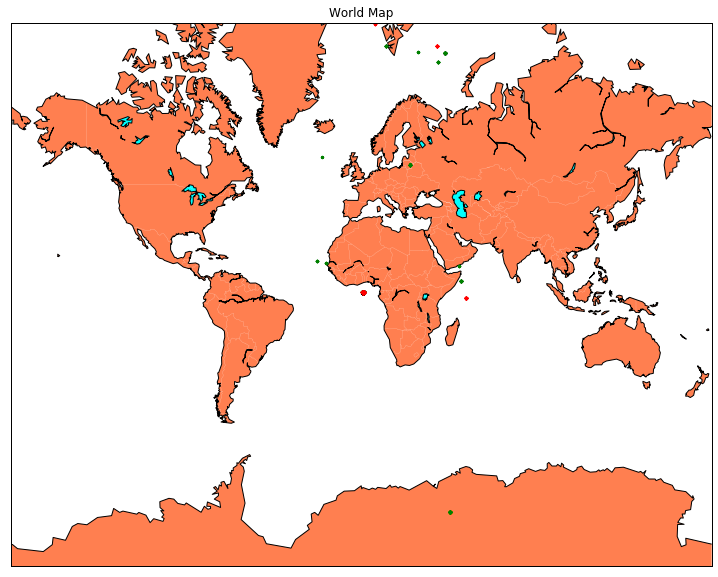

In [141]:
fig = plt.figure(figsize=(8, 8))

# Mercator of World
m = Basemap(projection='merc',
             llcrnrlat=-80,  #latitude of lower left hand corner of the desired map domain
             urcrnrlat=80, #latitude of upper right hand corner of the desired map domain
             llcrnrlon=-180, #longitude of lower left hand corner of the desired map domain
             urcrnrlon=180, #longitude of upper right hand corner of the desired map domain
             lat_ts=0, #latitude of true scale
             resolution='c') #resolution of boundary dataset being used - c for crude


m.fillcontinents(color='coral',lake_color='aqua')   # coral land, black lakes
m.drawmapboundary(fill_color='white')                # Aqua background
m.drawcountries(linewidth=0.15, color="w")          # thin white line for country borders
m.drawcoastlines()

# Plot the data
#mxy = m(geo_data["Longitude"].tolist(), geo_data["Latitude"].tolist())
mxy_1 = m(geo_data[geo_data["Gender"]==1].Latitude.tolist(), geo_data[geo_data["Gender"]==1].Longitude.tolist())
mxy_0 = m(geo_data[geo_data["Gender"]==0].Latitude.tolist(), geo_data[geo_data["Gender"]==0].Longitude.tolist())
m.scatter(mxy_1[0],mxy_1[1],s=5, c="green", zorder=2)    # zorder for the points 
m.scatter(mxy_0[0],mxy_0[1],s=5, c="red", zorder=2)    # zorder for the points  
fig.set_size_inches(20,10)



plt.title("World Map")
plt.show()

In [142]:
# In the above map the green dots cluster shows male and red dots shows female users demogrpahics across the world as per Gender's information

#### 3) Compare the event visualisation plots based on the following age groups: [0–24,25–32, 32+]

In [143]:
geo_data =df_all_data[["Longitude","Latitude","Group"]]

In [144]:
geo_data.head()

,Longitude,Latitude,Group
0,NaN,NaN,F25-32
1,NaN,NaN,F25-32
2,NaN,NaN,M25-32
3,119.61,29.70,M25-32
4,120.29,30.42,M25-32


In [145]:
geo_data = geo_data.dropna()

In [146]:
geo_data.head()

,Longitude,Latitude,Group
3,119.61,29.70,M25-32
4,120.29,30.42,M25-32
5,120.30,30.41,M25-32
6,119.69,29.80,M25-32
7,119.69,29.80,M25-32


In [147]:
geo_data.Group.head()

3    M25-32
4    M25-32
5    M25-32
6    M25-32
7    M25-32
Name: Group, dtype: object

In [148]:
categorical_columns = list(geo_data.loc[:, geo_data.dtypes =="object"].columns)
categorical_columns

['Group']

In [149]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

def MultiLabelEncoder(columnlist,dataframe):
    for i in columnlist:
        #print(i)
        labelencoder_X=LabelEncoder()
        dataframe[i]=labelencoder_X.fit_transform(dataframe[i])

MultiLabelEncoder(categorical_columns,geo_data)

In [150]:
geo_data.shape

(858859, 3)

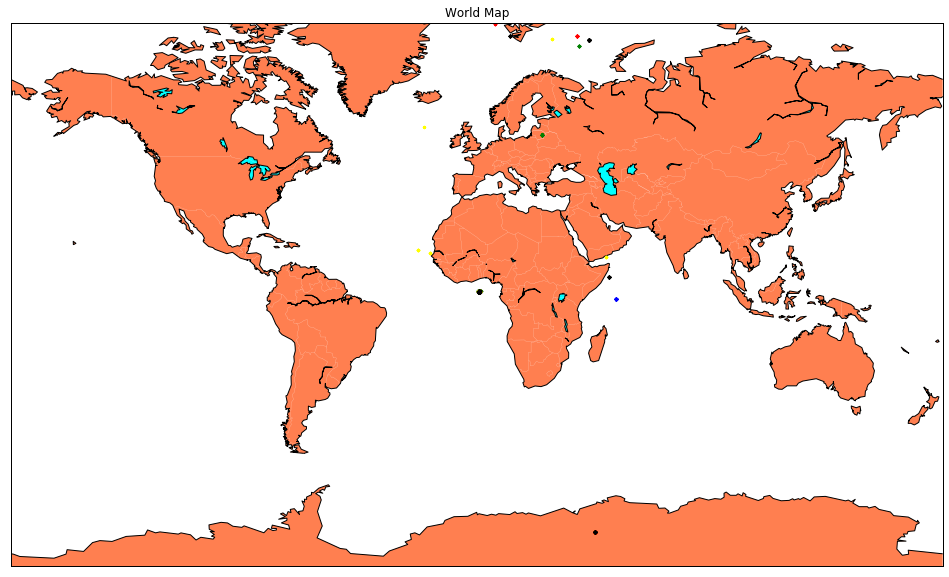

In [151]:
fig = plt.figure(figsize=(8, 8))

# Mercator of World
m = Basemap(projection='mill',
             llcrnrlat=-80,  #latitude of lower left hand corner of the desired map domain
             urcrnrlat=80, #latitude of upper right hand corner of the desired map domain
             llcrnrlon=-180, #longitude of lower left hand corner of the desired map domain
             urcrnrlon=180, #longitude of upper right hand corner of the desired map domain
             lat_ts=0, #latitude of true scale
             resolution='c') #resolution of boundary dataset being used - c for crude


m.fillcontinents(color='coral',lake_color='aqua')   # # coral land, black lakes
m.drawmapboundary(fill_color='white')                # aqua background
m.drawcountries(linewidth=0.15, color="w")          # thin white line for country borders
m.drawcoastlines()

# Plot the data
#mxy = m(geo_data["Longitude"].tolist(), geo_data["Latitude"].tolist())
mxy_1 = m(geo_data[geo_data["Group"]==1].Latitude.tolist(), geo_data[geo_data["Group"]==1].Longitude.tolist())
mxy_2 = m(geo_data[geo_data["Group"]==2].Latitude.tolist(), geo_data[geo_data["Group"]==2].Longitude.tolist())
mxy_3 = m(geo_data[geo_data["Group"]==3].Latitude.tolist(), geo_data[geo_data["Group"]==3].Longitude.tolist())
mxy_4 = m(geo_data[geo_data["Group"]==4].Latitude.tolist(), geo_data[geo_data["Group"]==4].Longitude.tolist())
mxy_5 = m(geo_data[geo_data["Group"]==5].Latitude.tolist(), geo_data[geo_data["Group"]==5].Longitude.tolist())
m.scatter(mxy_1[0],mxy_1[1],s=5, c="red", zorder=2)    # zorder for the points 
m.scatter(mxy_2[0],mxy_2[1],s=5, c="blue", zorder=2)    # zorder for the points 
m.scatter(mxy_3[0],mxy_3[1],s=5, c="green", zorder=2)    # zorder for the points 
m.scatter(mxy_4[0],mxy_4[1],s=5, c="yellow", zorder=2)
m.scatter(mxy_5[0],mxy_5[1],s=5, c="black", zorder=2)# zorder for the points 
fig.set_size_inches(20,10)


plt.title("World Map")
plt.show()

In [152]:
# In the above map the multiple color dots(Red,Yellow etc.) cluster shows users demographics across the world as per Age Group's information

## DBSCAN Clustreing

In [153]:
# Importing necessary libraries for DBSCAN

In [154]:
#!pip install geopy

In [155]:
#!pip install shapely

In [156]:
#!pip install sklearn 

In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import DBSCAN
from sklearn import metrics
import time
from geopy.distance import great_circle
from shapely.geometry import MultiPoint

In [158]:
# Assigning value for kms_per_radian

In [159]:
kms_per_radian = 6371.0088

In [160]:
## Have to drop Nan Values before running the DBSCAN as throwing error for large and NaN values

df_event = df_event.dropna()

In [161]:
df_event.head()

,Device_id,Gender,Age,Group,event_id,Event_timestamp,Longitude,Latitude,Total_events,Avg_events,Active Hour,Total_places_visited
0,-1001337759327040000,M,30,M25-32,2774404,2016-05-07 09:14:24,119.61,29.70,109,27.25,10,21
1,-1001337759327040000,M,30,M25-32,3065018,2016-05-04 10:26:14,120.29,30.42,109,27.25,10,21
2,-1001337759327040000,M,30,M25-32,3230344,2016-05-04 10:04:42,120.30,30.41,109,27.25,10,21
3,-1001337759327040000,M,30,M25-32,2906128,2016-05-07 10:24:32,119.69,29.80,109,27.25,10,21
4,-1001337759327040000,M,30,M25-32,2876843,2016-05-07 10:23:56,119.69,29.80,109,27.25,10,21


In [162]:
# Defining epsilon value

In [163]:
epsilon = 1.5/kms_per_radian

In [164]:
# Extracting Longitude & Latitude column values for co-ordinates "coords"

In [165]:
coords = df_event_merged[['Longitude', 'Latitude']]

In [166]:
coords.head()

,Longitude,Latitude
0,119.61,29.7
1,119.61,29.7
2,119.61,29.7
3,119.61,29.7
4,119.61,29.7


In [167]:
# Checking for duplicate entries
coords = coords.drop_duplicates()

In [168]:
coords.head()

,Longitude,Latitude
0,119.61,29.70
21,119.69,29.80
131,119.49,29.59
171,119.50,29.60
192,119.62,29.71


In [169]:
# Implementing DBSCAN Algorithm with ball_tree using haversine metircs for calculation

In [170]:
db = DBSCAN(eps= epsilon, min_samples= 1, algorithm = "ball_tree", metric = "haversine").fit(np.radians(coords))

In [171]:
# Cluster labels

In [172]:
cluster_labels = db.labels_

In [173]:
len(cluster_labels)

23929

In [174]:
#dir(db)

In [175]:
# get the number of clusters

In [176]:
num_clusters = len(set(cluster_labels))

In [177]:
print("Number of clusters: {}".format(num_clusters))

Number of clusters: 8213


In [178]:
coords['cluster_labels'] = pd.Series(cluster_labels, index=coords.index)

In [179]:
coords.head()

,Longitude,Latitude,cluster_labels
0,119.61,29.70,0
21,119.69,29.80,1
131,119.49,29.59,2
171,119.50,29.60,2
192,119.62,29.71,0


In [180]:
# Merging coords data with final data "df_event_merged"

In [181]:
df_event_final = pd.merge(df_event_merged,coords, on = ['Longitude','Latitude'], how = 'inner')

In [182]:
df_event_final.head()

,Device_id,Gender,Age,Group,event_id,Event_timestamp,Longitude,Latitude,Total_events,Avg_events,Active Hour,Total_places_visited,is_installed,is_active,category,cluster_labels
0,-1001337759327040000,M,30,M25-32,2774404,2016-05-07 09:14:24,119.61,29.7,109,27.25,10,21,1,1,Industry tag,0
1,-1001337759327040000,M,30,M25-32,2774404,2016-05-07 09:14:24,119.61,29.7,109,27.25,10,21,1,1,Property Industry 1.0,0
2,-1001337759327040000,M,30,M25-32,2774404,2016-05-07 09:14:24,119.61,29.7,109,27.25,10,21,1,1,Industry tag,0
3,-1001337759327040000,M,30,M25-32,2774404,2016-05-07 09:14:24,119.61,29.7,109,27.25,10,21,1,1,Property Industry 1.0,0
4,-1001337759327040000,M,30,M25-32,2774404,2016-05-07 09:14:24,119.61,29.7,109,27.25,10,21,1,1,Taxi,0


In [183]:
categorical_columns = list(df_event_final.loc[:, df_event_final.dtypes =="object"].columns)
categorical_columns

['Gender', 'Group', 'category']

In [184]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

def MultiLabelEncoder(columnlist,dataframe):
    for i in columnlist:
        #print(i)
        labelencoder_X=LabelEncoder()
        dataframe[i]=labelencoder_X.fit_transform(dataframe[i])

MultiLabelEncoder(categorical_columns,df_event_final)

In [185]:
df_event_final.head()

,Device_id,Gender,Age,Group,event_id,Event_timestamp,Longitude,Latitude,Total_events,Avg_events,Active Hour,Total_places_visited,is_installed,is_active,category,cluster_labels
0,-1001337759327040000,1,30,4,2774404,2016-05-07 09:14:24,119.61,29.7,109,27.25,10,21,1,1,117,0
1,-1001337759327040000,1,30,4,2774404,2016-05-07 09:14:24,119.61,29.7,109,27.25,10,21,1,1,184,0
2,-1001337759327040000,1,30,4,2774404,2016-05-07 09:14:24,119.61,29.7,109,27.25,10,21,1,1,117,0
3,-1001337759327040000,1,30,4,2774404,2016-05-07 09:14:24,119.61,29.7,109,27.25,10,21,1,1,184,0
4,-1001337759327040000,1,30,4,2774404,2016-05-07 09:14:24,119.61,29.7,109,27.25,10,21,1,1,226,0


In [186]:
df_event_final.drop(['Longitude','Latitude'],axis=1,inplace =True)

In [187]:
df_event_final.head()

,Device_id,Gender,Age,Group,event_id,Event_timestamp,Total_events,Avg_events,Active Hour,Total_places_visited,is_installed,is_active,category,cluster_labels
0,-1001337759327040000,1,30,4,2774404,2016-05-07 09:14:24,109,27.25,10,21,1,1,117,0
1,-1001337759327040000,1,30,4,2774404,2016-05-07 09:14:24,109,27.25,10,21,1,1,184,0
2,-1001337759327040000,1,30,4,2774404,2016-05-07 09:14:24,109,27.25,10,21,1,1,117,0
3,-1001337759327040000,1,30,4,2774404,2016-05-07 09:14:24,109,27.25,10,21,1,1,184,0
4,-1001337759327040000,1,30,4,2774404,2016-05-07 09:14:24,109,27.25,10,21,1,1,226,0


## Model Buliding Algorithms

In [188]:
# Algorithms Used are:

#Scenario 1:
    #Gender Prediction - Logistic & XG Boost
    #Age Prediction - Linear & XG Boost
    
#Scenario 2 :

    #Age Prediction - Linear & XG Boost
    #Gender Prediction - Logistic & XG Boost

### Scenario 1 - Gender & Age Predicition

In [189]:
# Getting Event data ready

In [190]:
df_data = df_event_final

df_data.head()

,Device_id,Gender,Age,Group,event_id,Event_timestamp,Total_events,Avg_events,Active Hour,Total_places_visited,is_installed,is_active,category,cluster_labels
0,-1001337759327040000,1,30,4,2774404,2016-05-07 09:14:24,109,27.25,10,21,1,1,117,0
1,-1001337759327040000,1,30,4,2774404,2016-05-07 09:14:24,109,27.25,10,21,1,1,184,0
2,-1001337759327040000,1,30,4,2774404,2016-05-07 09:14:24,109,27.25,10,21,1,1,117,0
3,-1001337759327040000,1,30,4,2774404,2016-05-07 09:14:24,109,27.25,10,21,1,1,184,0
4,-1001337759327040000,1,30,4,2774404,2016-05-07 09:14:24,109,27.25,10,21,1,1,226,0


In [191]:
df_data.dtypes

Device_id                        int64
Gender                           int32
Age                              int64
Group                            int32
event_id                         int64
Event_timestamp         datetime64[ns]
Total_events                     int64
Avg_events                     float64
Active Hour                      int64
Total_places_visited             int64
is_installed                     int64
is_active                        int64
category                         int32
cluster_labels                   int64
dtype: object

In [192]:
# Getting train_test_split data ready

In [193]:
dataset = 'train_test_split.csv'
df_train_test = pd.read_csv(dataset)
df_train_test.head()

,device_id,gender,age,group,train_test_flag
0,-7548291590301750000,M,33,M32+,train
1,6943568600617760000,M,37,M32+,train
2,5441349705980020000,M,40,M32+,train
3,-5393876656119450000,M,33,M32+,train
4,4543988487649880000,M,53,M32+,train


In [194]:
df_train_test.columns =["Device_id","Gender","Age","Group","train_test_flag"]

In [195]:
df_train_test.head()

,Device_id,Gender,Age,Group,train_test_flag
0,-7548291590301750000,M,33,M32+,train
1,6943568600617760000,M,37,M32+,train
2,5441349705980020000,M,40,M32+,train
3,-5393876656119450000,M,33,M32+,train
4,4543988487649880000,M,53,M32+,train


In [196]:
# Merging final event data with train test data

In [197]:
df_data_train_test = pd.merge(df_data,df_train_test,on ='Device_id',how ='inner')

In [198]:
df_data_train_test.head()

,Device_id,Gender_x,Age_x,Group_x,event_id,Event_timestamp,Total_events,Avg_events,Active Hour,Total_places_visited,is_installed,is_active,category,cluster_labels,Gender_y,Age_y,Group_y,train_test_flag
0,-1001337759327040000,1,30,4,2774404,2016-05-07 09:14:24,109,27.25,10,21,1,1,117,0,M,30,M25-32,train
1,-1001337759327040000,1,30,4,2774404,2016-05-07 09:14:24,109,27.25,10,21,1,1,184,0,M,30,M25-32,train
2,-1001337759327040000,1,30,4,2774404,2016-05-07 09:14:24,109,27.25,10,21,1,1,117,0,M,30,M25-32,train
3,-1001337759327040000,1,30,4,2774404,2016-05-07 09:14:24,109,27.25,10,21,1,1,184,0,M,30,M25-32,train
4,-1001337759327040000,1,30,4,2774404,2016-05-07 09:14:24,109,27.25,10,21,1,1,226,0,M,30,M25-32,train


In [199]:
# Dropping extra columns 

In [200]:
df_data_train_test.drop(["Gender_y","Age_y","Group_y"],axis=1,inplace=True)

In [201]:
df_data_train_test.head()

,Device_id,Gender_x,Age_x,Group_x,event_id,Event_timestamp,Total_events,Avg_events,Active Hour,Total_places_visited,is_installed,is_active,category,cluster_labels,train_test_flag
0,-1001337759327040000,1,30,4,2774404,2016-05-07 09:14:24,109,27.25,10,21,1,1,117,0,train
1,-1001337759327040000,1,30,4,2774404,2016-05-07 09:14:24,109,27.25,10,21,1,1,184,0,train
2,-1001337759327040000,1,30,4,2774404,2016-05-07 09:14:24,109,27.25,10,21,1,1,117,0,train
3,-1001337759327040000,1,30,4,2774404,2016-05-07 09:14:24,109,27.25,10,21,1,1,184,0,train
4,-1001337759327040000,1,30,4,2774404,2016-05-07 09:14:24,109,27.25,10,21,1,1,226,0,train


In [202]:
# Renaming the columns after merging

In [203]:
df_data_train_test.rename(columns = {'Gender_x':'Gender','Age_x':'Age','Group_x':'Group'}, inplace = True)

In [204]:
df_data_train_test.head()

,Device_id,Gender,Age,Group,event_id,Event_timestamp,Total_events,Avg_events,Active Hour,Total_places_visited,is_installed,is_active,category,cluster_labels,train_test_flag
0,-1001337759327040000,1,30,4,2774404,2016-05-07 09:14:24,109,27.25,10,21,1,1,117,0,train
1,-1001337759327040000,1,30,4,2774404,2016-05-07 09:14:24,109,27.25,10,21,1,1,184,0,train
2,-1001337759327040000,1,30,4,2774404,2016-05-07 09:14:24,109,27.25,10,21,1,1,117,0,train
3,-1001337759327040000,1,30,4,2774404,2016-05-07 09:14:24,109,27.25,10,21,1,1,184,0,train
4,-1001337759327040000,1,30,4,2774404,2016-05-07 09:14:24,109,27.25,10,21,1,1,226,0,train


In [205]:
# Checking for categorical columns

In [206]:
categorical_columns = list(df_data_train_test.loc[:, df_data_train_test.dtypes =="object"].columns)
categorical_columns

['train_test_flag']

In [207]:
# Applying label encoding for the variables

In [208]:
from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import OneHotEncoder

def MultiLabelEncoder(columnlist,dataframe):
    for i in columnlist:
        #print(i)
        labelencoder_X=LabelEncoder()
        dataframe[i]=labelencoder_X.fit_transform(dataframe[i])

MultiLabelEncoder(categorical_columns,df_data_train_test)

In [209]:
df_data_train_test.head(5)

,Device_id,Gender,Age,Group,event_id,Event_timestamp,Total_events,Avg_events,Active Hour,Total_places_visited,is_installed,is_active,category,cluster_labels,train_test_flag
0,-1001337759327040000,1,30,4,2774404,2016-05-07 09:14:24,109,27.25,10,21,1,1,117,0,1
1,-1001337759327040000,1,30,4,2774404,2016-05-07 09:14:24,109,27.25,10,21,1,1,184,0,1
2,-1001337759327040000,1,30,4,2774404,2016-05-07 09:14:24,109,27.25,10,21,1,1,117,0,1
3,-1001337759327040000,1,30,4,2774404,2016-05-07 09:14:24,109,27.25,10,21,1,1,184,0,1
4,-1001337759327040000,1,30,4,2774404,2016-05-07 09:14:24,109,27.25,10,21,1,1,226,0,1


In [210]:
df_data_train_test.shape

(9871156, 15)

In [211]:
df_data_train_test.head()

,Device_id,Gender,Age,Group,event_id,Event_timestamp,Total_events,Avg_events,Active Hour,Total_places_visited,is_installed,is_active,category,cluster_labels,train_test_flag
0,-1001337759327040000,1,30,4,2774404,2016-05-07 09:14:24,109,27.25,10,21,1,1,117,0,1
1,-1001337759327040000,1,30,4,2774404,2016-05-07 09:14:24,109,27.25,10,21,1,1,184,0,1
2,-1001337759327040000,1,30,4,2774404,2016-05-07 09:14:24,109,27.25,10,21,1,1,117,0,1
3,-1001337759327040000,1,30,4,2774404,2016-05-07 09:14:24,109,27.25,10,21,1,1,184,0,1
4,-1001337759327040000,1,30,4,2774404,2016-05-07 09:14:24,109,27.25,10,21,1,1,226,0,1


### The Data is very huge as shown above approx 98 Lakhs rows, so we will be dropping columns : event_id & Event_timestamp. This is becuase we have already gathered the event info as part of our feature engineering tasks. Columns : Total_events,Avg_events & Active Hour

In [212]:
#df_data_train_test.drop(["Event_timestamp","event_id"],axis=1,inplace=True)

In [213]:
## We are dropping the duplicates

In [214]:
#df_data_train_test = df_data_train_test.drop_duplicates()

In [215]:
### We tried dropping duplicates ,however there was memory issue. So we are moving ahead with around 4lakhs data rows to continue with the mdel building

In [216]:
df_data_train_test = df_data_train_test[0:450000]

In [217]:
df_data_train_test.shape

(450000, 15)

In [218]:
# Both Age and Gender are the target variables, so assigning them separately in y1 & y2 and removing from predictors "X"

In [219]:
y1 = df_data_train_test['Age']
y2 = df_data_train_test['Gender']
X = df_data_train_test.drop(['Age','Gender'], axis=1)

In [220]:
# Preparing train & test data

In [221]:
X['train_test_flag'].value_counts()

1    296512
0    153488
Name: train_test_flag, dtype: int64

In [222]:
# GroupShuffleSplit is used below as it generates a user-determined number of random test splits, each with a user-determined fraction of unique groups.

In [223]:
from sklearn.model_selection import GroupShuffleSplit

In [224]:
gs = GroupShuffleSplit(n_splits=2, train_size=.7)

In [225]:
train_ix, test_ix = next(gs.split(X, y2, groups=X.train_test_flag))

X_train = X.loc[train_ix]
y_train = y2.loc[train_ix]

X_test = X.loc[test_ix]
y_test = y2.loc[test_ix]

In [226]:
print(X_train.head())
print(X_train.shape)

print("\nX_test:\n")
print(X_test.head())
print(X_test.shape)

             Device_id  Group  event_id     Event_timestamp  Total_events  \
0 -1001337759327040000      4   2774404 2016-05-07 09:14:24           109   
1 -1001337759327040000      4   2774404 2016-05-07 09:14:24           109   
2 -1001337759327040000      4   2774404 2016-05-07 09:14:24           109   
3 -1001337759327040000      4   2774404 2016-05-07 09:14:24           109   
4 -1001337759327040000      4   2774404 2016-05-07 09:14:24           109   

   Avg_events  Active Hour  Total_places_visited  is_installed  is_active  \
0       27.25           10                    21             1          1   
1       27.25           10                    21             1          1   
2       27.25           10                    21             1          1   
3       27.25           10                    21             1          1   
4       27.25           10                    21             1          1   

   category  cluster_labels  train_test_flag  
0       117               0

In [227]:
y_train.head()

0    1
1    1
2    1
3    1
4    1
Name: Gender, dtype: int32

In [228]:
y_test.head()

1527    1
1528    1
1529    1
1530    1
1531    1
Name: Gender, dtype: int32

In [229]:
# Dropping Columns as not required here

In [230]:
X_train.drop(["train_test_flag"],axis=1,inplace=True)

In [231]:
X_test.drop(["train_test_flag"],axis=1,inplace=True)

In [232]:
X_train.head()

,Device_id,Group,event_id,Event_timestamp,Total_events,Avg_events,Active Hour,Total_places_visited,is_installed,is_active,category,cluster_labels
0,-1001337759327040000,4,2774404,2016-05-07 09:14:24,109,27.25,10,21,1,1,117,0
1,-1001337759327040000,4,2774404,2016-05-07 09:14:24,109,27.25,10,21,1,1,184,0
2,-1001337759327040000,4,2774404,2016-05-07 09:14:24,109,27.25,10,21,1,1,117,0
3,-1001337759327040000,4,2774404,2016-05-07 09:14:24,109,27.25,10,21,1,1,184,0
4,-1001337759327040000,4,2774404,2016-05-07 09:14:24,109,27.25,10,21,1,1,226,0


In [233]:
X_test.head()

,Device_id,Group,event_id,Event_timestamp,Total_events,Avg_events,Active Hour,Total_places_visited,is_installed,is_active,category,cluster_labels
1527,1442443690169430000,4,1416193,2016-05-07 06:42:34,19,2.714286,6,3,1,1,116,3
1528,1442443690169430000,4,1416193,2016-05-07 06:42:34,19,2.714286,6,3,1,1,90,3
1529,1442443690169430000,4,1416193,2016-05-07 06:42:34,19,2.714286,6,3,1,1,140,3
1530,1442443690169430000,4,1416193,2016-05-07 06:42:34,19,2.714286,6,3,1,1,207,3
1531,1442443690169430000,4,1416193,2016-05-07 06:42:34,19,2.714286,6,3,1,1,93,3


In [234]:
# Dropping Columns as not required

In [235]:
X_test.drop(["Event_timestamp"],axis=1,inplace=True)

In [236]:
X_train.drop(["Event_timestamp"],axis=1,inplace=True)

In [237]:
X_train.head()

,Device_id,Group,event_id,Total_events,Avg_events,Active Hour,Total_places_visited,is_installed,is_active,category,cluster_labels
0,-1001337759327040000,4,2774404,109,27.25,10,21,1,1,117,0
1,-1001337759327040000,4,2774404,109,27.25,10,21,1,1,184,0
2,-1001337759327040000,4,2774404,109,27.25,10,21,1,1,117,0
3,-1001337759327040000,4,2774404,109,27.25,10,21,1,1,184,0
4,-1001337759327040000,4,2774404,109,27.25,10,21,1,1,226,0


In [238]:
X_test.head()

,Device_id,Group,event_id,Total_events,Avg_events,Active Hour,Total_places_visited,is_installed,is_active,category,cluster_labels
1527,1442443690169430000,4,1416193,19,2.714286,6,3,1,1,116,3
1528,1442443690169430000,4,1416193,19,2.714286,6,3,1,1,90,3
1529,1442443690169430000,4,1416193,19,2.714286,6,3,1,1,140,3
1530,1442443690169430000,4,1416193,19,2.714286,6,3,1,1,207,3
1531,1442443690169430000,4,1416193,19,2.714286,6,3,1,1,93,3


### Taking random 50 device_ids for the model deployment and testing

In [239]:
Test_csv_50 = X_test.sample(n=50, random_state=1)

In [240]:
Test_csv_50.head(50)

,Device_id,Group,event_id,Total_events,Avg_events,Active Hour,Total_places_visited,is_installed,is_active,category,cluster_labels
72037,9125896648976320000,1,1138561,791,113.000000,18,24,1,1,185,1067
24331,9125896648976320000,1,728323,791,113.000000,18,24,1,1,184,3
11983,9125896648976320000,1,1661287,791,113.000000,18,24,1,1,69,3
57250,9125896648976320000,1,343593,791,113.000000,18,24,1,1,173,3
32450,9125896648976320000,1,1641151,791,113.000000,18,24,1,1,142,3
59459,9125896648976320000,1,581532,791,113.000000,18,24,1,1,103,3
18942,9125896648976320000,1,2931299,791,113.000000,18,24,1,1,400,3
54972,9125896648976320000,1,381528,791,113.000000,18,24,1,1,292,3
59115,9125896648976320000,1,642929,791,113.000000,18,24,1,1,185,3
66846,9125896648976320000,1,1057252,791,113.000000,18,24,1,1,207,1066


In [241]:
Test_csv_50.to_csv("Test_csv_50.csv")

In [242]:
X_train.head()

,Device_id,Group,event_id,Total_events,Avg_events,Active Hour,Total_places_visited,is_installed,is_active,category,cluster_labels
0,-1001337759327040000,4,2774404,109,27.25,10,21,1,1,117,0
1,-1001337759327040000,4,2774404,109,27.25,10,21,1,1,184,0
2,-1001337759327040000,4,2774404,109,27.25,10,21,1,1,117,0
3,-1001337759327040000,4,2774404,109,27.25,10,21,1,1,184,0
4,-1001337759327040000,4,2774404,109,27.25,10,21,1,1,226,0


### Scenario 1: Gender Prediction

#### Logistic Regression Model

In [243]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [244]:
# Logsitic Regression Classifier

In [245]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Model Evaluation

In [246]:
# Overall Accuracy of logistic regression

In [247]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.83


In [248]:
# Confusion_Matrix

In [249]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[96068  4446]
 [22402 30572]]


In [250]:
# Classification_Report(precision,recall,f1-score)

In [251]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88    100514
           1       0.87      0.58      0.69     52974

    accuracy                           0.83    153488
   macro avg       0.84      0.77      0.79    153488
weighted avg       0.83      0.83      0.81    153488



In [252]:
# ROC auc_score & curve

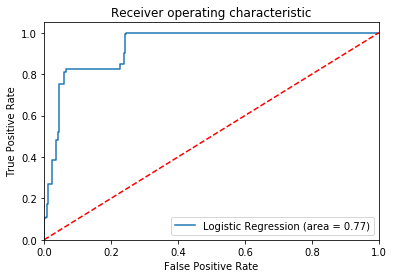

In [253]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### KS Statistic for Scenario 1 Gender Prediction

In [254]:
logreg.predict_proba(X_train)

array([[0.48666102, 0.51333898],
       [0.48666102, 0.51333898],
       [0.48666102, 0.51333898],
       ...,
       [0.60699604, 0.39300396],
       [0.60699604, 0.39300396],
       [0.60699604, 0.39300396]])

In [255]:
df_ks_metric = pd.DataFrame()

In [256]:
# Let us create another datafram with only those columns which are needed for calculation of KS Metric
df_ks_metric["Device_id"] = X_train['Device_id']

In [257]:
df_ks_metric["Gender"] = y_train

In [258]:
df_ks_metric.head()

,Device_id,Gender
0,-1001337759327040000,1
1,-1001337759327040000,1
2,-1001337759327040000,1
3,-1001337759327040000,1
4,-1001337759327040000,1


In [259]:
probability = logreg.predict_proba(X_train)

In [260]:
df_ks_metric = pd.concat([df_ks_metric, pd.DataFrame(probability)], axis=1)

In [261]:
df_ks_metric.head()

,Device_id,Gender,0,1
0,-1.001338e+18,1.0,0.486661,0.513339
1,-1.001338e+18,1.0,0.486661,0.513339
2,-1.001338e+18,1.0,0.486661,0.513339
3,-1.001338e+18,1.0,0.486661,0.513339
4,-1.001338e+18,1.0,0.486661,0.513339


In [262]:
df_ks_metric.drop([1], axis=1,inplace =True)

In [263]:
df_ks_metric.rename(columns = {0: 'p_final'},inplace=True)

In [264]:
df_ks_metric.head()

,Device_id,Gender,p_final
0,-1.001338e+18,1.0,0.486661
1,-1.001338e+18,1.0,0.486661
2,-1.001338e+18,1.0,0.486661
3,-1.001338e+18,1.0,0.486661
4,-1.001338e+18,1.0,0.486661


In [265]:
#Separate the probability into bins

In [266]:
import pandas as pd
df_ks_metric['good'] = 1 - df_ks_metric.Gender
df_ks_metric['bucket'] = pd.qcut(df_ks_metric.p_final, 10)
df_ks_metric.head()

,Device_id,Gender,p_final,good,bucket
0,-1.001338e+18,1.0,0.486661,0.0,"(0.478, 0.488]"
1,-1.001338e+18,1.0,0.486661,0.0,"(0.478, 0.488]"
2,-1.001338e+18,1.0,0.486661,0.0,"(0.478, 0.488]"
3,-1.001338e+18,1.0,0.486661,0.0,"(0.478, 0.488]"
4,-1.001338e+18,1.0,0.486661,0.0,"(0.478, 0.488]"


In [267]:
#Calculate good, bad and total for each bucket with Gender being 0(Female) as Good and 1(Male) as Bad

In [268]:
pd_prob_grouping = df_ks_metric.groupby('bucket', as_index = False)
pd_final_grouping = pd.DataFrame()
pd_final_grouping['min_scr'] = pd_prob_grouping.min().p_final
pd_final_grouping['max_scr'] = pd_prob_grouping.max().p_final
pd_final_grouping['bads'] = pd_prob_grouping.sum().Gender
pd_final_grouping['goods'] = pd_prob_grouping.sum().good
pd_final_grouping['total'] = pd_final_grouping.bads + pd_final_grouping.goods
pd_final_grouping

,min_scr,max_scr,bads,goods,total
0,0.379930,0.404284,18235.0,1209.0,19444.0
1,0.404920,0.417056,18795.0,6763.0,25558.0
2,0.417608,0.443658,0.0,0.0,0.0
3,0.447019,0.477709,0.0,0.0,0.0
4,0.479421,0.487558,22504.0,2245.0,24749.0
5,0.488201,0.509897,7142.0,1046.0,8188.0
6,0.510375,0.524429,23233.0,8059.0,31292.0
7,0.525423,0.541283,22940.0,1528.0,24468.0
8,0.541992,0.578595,16453.0,4303.0,20756.0
9,0.580484,0.617210,21922.0,4492.0,26414.0


In [269]:
# Calculate cumulative good percentage, bad percentage and KS Statistic

In [270]:
pd_ks_calc = (pd_final_grouping.sort_values(by = 'min_scr')).reset_index(drop = True)
pd_ks_calc['odds'] = (pd_ks_calc.goods / pd_ks_calc.bads).apply('{0:.2f}'.format)
pd_ks_calc['bad_rate'] = (pd_ks_calc.bads / pd_ks_calc.total).apply('{0:.2%}'.format)
pd_ks_calc['ks'] = np.round(((pd_ks_calc.bads / df_ks_metric.Gender.sum()).cumsum() - (pd_ks_calc.goods / df_ks_metric.good.sum()).cumsum()), 4) * 100
flag = lambda x: '<----' if x == pd_ks_calc.ks.max() else ''
pd_ks_calc['max_ks'] = pd_ks_calc.ks.apply(flag)
pd_ks_calc

,min_scr,max_scr,bads,goods,total,odds,bad_rate,ks,max_ks
0,0.379930,0.404284,18235.0,1209.0,19444.0,0.07,93.78%,4.37,<----
1,0.404920,0.417056,18795.0,6763.0,25558.0,0.36,73.54%,-3.98,
2,0.417608,0.443658,0.0,0.0,0.0,nan,nan%,-3.98,
3,0.447019,0.477709,0.0,0.0,0.0,nan,nan%,-3.98,
4,0.479421,0.487558,22504.0,2245.0,24749.0,0.10,90.93%,-0.33,
5,0.488201,0.509897,7142.0,1046.0,8188.0,0.15,87.23%,0.05,
6,0.510375,0.524429,23233.0,8059.0,31292.0,0.35,74.25%,-9.57,
7,0.525423,0.541283,22940.0,1528.0,24468.0,0.07,93.76%,-4.09,
8,0.541992,0.578595,16453.0,4303.0,20756.0,0.26,79.27%,-7.63,
9,0.580484,0.617210,21922.0,4492.0,26414.0,0.20,82.99%,-9.45,


#### From the above calculations the highest KS value is 4.37 with probability 0.379930

### XGBoost

In [271]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from xgboost import XGBClassifier,plot_tree

In [272]:
params = {

        'gamma': [0.5, 1, 1.5, 2, 5],

        'max_depth': [3, 4, 5]

 }

In [273]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import time
import warnings
warnings.filterwarnings('ignore')


import xgboost as xgb

start_time = time.time()

clf_xgb = xgb.XGBClassifier(learning_rate=0.3, 
                            n_estimators=600, 
                            max_depth=5,
                            min_child_weight=9,
                            gamma=0.2,
                            subsample=1,
                            colsample_bytree=0.4,
                            objective= 'binary:logistic',
                            nthread=-1,
                            scale_pos_weight=1,
                            reg_alpha = 0.6,
                            reg_lambda = 3,
                            seed=42)
    
clf_xgb = GridSearchCV(
                    clf_xgb, 
                    params,
                    cv=2,
                    scoring='accuracy',
                    )

clf_xgb.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], 
            early_stopping_rounds=100, eval_metric='auc', verbose=100)

predictions = clf_xgb.predict(X_test)

print()
print(classification_report(y_test, predictions))

print()
print("accuracy_score", accuracy_score(y_test, predictions))

print()
predictions_probas = clf_xgb.predict_proba(X_test)
print("roc-auc score for the class 1, from target" , roc_auc_score(y_test, predictions_probas[:,1]))

print()
print("elapsed time in seconds: ", time.time() - start_time)

print('-----')
print(f'Best parameters {clf_xgb.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + 
    f'{clf_xgb.best_score_:.3f}'
)

[0]	validation_0-auc:0.77245	validation_1-auc:0.08585
[100]	validation_0-auc:1.00000	validation_1-auc:1.00000
[102]	validation_0-auc:1.00000	validation_1-auc:1.00000
[0]	validation_0-auc:0.71470	validation_1-auc:0.08837
[100]	validation_0-auc:1.00000	validation_1-auc:1.00000
[0]	validation_0-auc:0.80647	validation_1-auc:0.19054
[100]	validation_0-auc:1.00000	validation_1-auc:1.00000
[101]	validation_0-auc:1.00000	validation_1-auc:1.00000
[0]	validation_0-auc:0.72847	validation_1-auc:0.08918
[100]	validation_0-auc:1.00000	validation_1-auc:1.00000
[102]	validation_0-auc:1.00000	validation_1-auc:1.00000
[0]	validation_0-auc:0.82305	validation_1-auc:0.18633
[100]	validation_0-auc:1.00000	validation_1-auc:1.00000
[102]	validation_0-auc:1.00000	validation_1-auc:1.00000
[0]	validation_0-auc:0.74833	validation_1-auc:0.08651
[100]	validation_0-auc:1.00000	validation_1-auc:1.00000
[101]	validation_0-auc:1.00000	validation_1-auc:1.00000
[0]	validation_0-auc:0.77245	validation_1-auc:0.08585
[100]	

### Stacking - Scenario 1 - Gender

In [274]:
# Stacking below is being done on Gender Scenario 1

In [275]:
import pandas as pd
from sklearn import preprocessing
from mlxtend.classifier import StackingCVClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn import model_selection
import numpy as np
from xgboost import XGBClassifier

In [276]:
# data for training 

In [277]:
X_train.head()

,Device_id,Group,event_id,Total_events,Avg_events,Active Hour,Total_places_visited,is_installed,is_active,category,cluster_labels
0,-1001337759327040000,4,2774404,109,27.25,10,21,1,1,117,0
1,-1001337759327040000,4,2774404,109,27.25,10,21,1,1,184,0
2,-1001337759327040000,4,2774404,109,27.25,10,21,1,1,117,0
3,-1001337759327040000,4,2774404,109,27.25,10,21,1,1,184,0
4,-1001337759327040000,4,2774404,109,27.25,10,21,1,1,226,0


In [278]:
y_train.head()

0    1
1    1
2    1
3    1
4    1
Name: Gender, dtype: int32

In [279]:
# test data

In [280]:
predids = y_test 
preddata = X_test
preddata.head()

,Device_id,Group,event_id,Total_events,Avg_events,Active Hour,Total_places_visited,is_installed,is_active,category,cluster_labels
1527,1442443690169430000,4,1416193,19,2.714286,6,3,1,1,116,3
1528,1442443690169430000,4,1416193,19,2.714286,6,3,1,1,90,3
1529,1442443690169430000,4,1416193,19,2.714286,6,3,1,1,140,3
1530,1442443690169430000,4,1416193,19,2.714286,6,3,1,1,207,3
1531,1442443690169430000,4,1416193,19,2.714286,6,3,1,1,93,3


In [281]:
predids.head()

1527    1
1528    1
1529    1
1530    1
1531    1
Name: Gender, dtype: int32

In [282]:
# Scaling the data
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(X_train)
X_train = pd.DataFrame(scaled_df)
scaled_df = scaler.fit_transform(preddata)
preddata = pd.DataFrame(scaled_df)

In [283]:
# x,y to np 
x_train = X_train.values
y_train = y_train.values

In [284]:
# 1st set of models
clf1 = LogisticRegression()
clf2 = RandomForestClassifier(random_state=1, n_estimators=10)
xgb = XGBClassifier()

stacking = StackingCVClassifier(classifiers=[clf1, clf2], meta_classifier=xgb, use_probas=True, cv=3)

In [285]:
# Do CV
 
for clf, label in zip([clf1, clf2, stacking], 
                      ['lr', 
                       'Random Forest', 
                       'StackingClassifier']):

    scores = model_selection.cross_val_score(clf, x_train, y_train, cv=3, scoring='roc_auc')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))


Accuracy: 1.00 (+/- 0.00) [lr]
Accuracy: 1.00 (+/- 0.00) [Random Forest]
[20:01:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:01:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:01:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavio

In [287]:
# Fit on train data / predict on test data
sclf_fit = stacking.fit(x_train, y_train)
mypredict = sclf_fit.predict(preddata)
mypreds_proba = sclf_fit.predict_proba(preddata)

[20:05:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [288]:
# "predict" give us classes, "predict_proba" give us probabilities

# Probabilities for classes (1,0)
zeros = [i[0] for i in mypreds_proba]
ones  = [i[1] for i in mypreds_proba]

# Get IDs and predictions
y_id = predids.values.tolist()
preddf = pd.DataFrame({'device_id': y_id,'target': ones})
preddf['device_id'] = preddf['device_id'].map(lambda x: str(x)[:-2])
preddf['device_id'] = preddf['device_id'].map(lambda x: str(x)[2:])

# Look at predictions
print(preddf.head())

  device_id    target
0            0.999997
1            0.999997
2            0.999997
3            0.999997
4            0.999997


In [289]:
# ROC auc_score & curve for stacking model

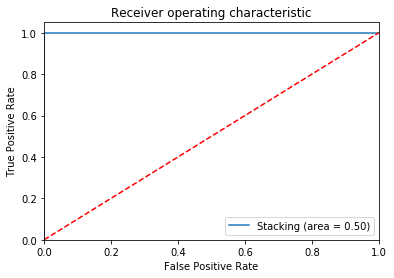

In [290]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test,mypredict)
fpr, tpr, thresholds = roc_curve(y_test, mypreds_proba[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Stacking (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Stacking_ROC')
plt.show()

### Stacking is better than the Logistic Regression as AUC is greater than LR as shown above.

## Saving the best model - stacking to pickle to be used for deployment

In [291]:
import pickle

In [292]:
# Saving model to disk
pickle.dump(stacking, open('model_gender_sc01.pkl', 'wb'))

### Scenario 1: Age Prediction

In [293]:
# GroupShuffleSplit is used below as it generates a user-determined number of random test splits, each with a user-determined fraction of unique groups.

In [294]:
train_ix, test_ix = next(gs.split(X, y1, groups=X.train_test_flag))

X_train = X.loc[train_ix]
y_train = y1.loc[train_ix]

X_test = X.loc[test_ix]
y_test = y1.loc[test_ix]

In [295]:
y_train.head()

1527    29
1528    29
1529    29
1530    29
1531    29
Name: Age, dtype: int64

In [296]:
y_test.head()

0    30
1    30
2    30
3    30
4    30
Name: Age, dtype: int64

### Linear Regression

In [297]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [298]:
# Model initialization
regression_model = LinearRegression()

In [299]:
X_train.head()

,Device_id,Group,event_id,Event_timestamp,Total_events,Avg_events,Active Hour,Total_places_visited,is_installed,is_active,category,cluster_labels,train_test_flag
1527,1442443690169430000,4,1416193,2016-05-07 06:42:34,19,2.714286,6,3,1,1,116,3,0
1528,1442443690169430000,4,1416193,2016-05-07 06:42:34,19,2.714286,6,3,1,1,90,3,0
1529,1442443690169430000,4,1416193,2016-05-07 06:42:34,19,2.714286,6,3,1,1,140,3,0
1530,1442443690169430000,4,1416193,2016-05-07 06:42:34,19,2.714286,6,3,1,1,207,3,0
1531,1442443690169430000,4,1416193,2016-05-07 06:42:34,19,2.714286,6,3,1,1,93,3,0


In [300]:
# Dropping Columns as not required

In [301]:
X_train.drop(["train_test_flag"],axis=1,inplace=True)

In [302]:
X_test.drop(["train_test_flag"],axis=1,inplace=True)

In [303]:
# Dropping Columns as not required

In [304]:
X_test.drop(["Event_timestamp"],axis=1,inplace=True)

In [305]:
X_train.drop(["Event_timestamp"],axis=1,inplace=True)

In [306]:
# Fit the data(train the model)
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [307]:
# Predict
y_predicted = regression_model.predict(X_train)
y_predicted

array([30.31304378, 30.31304405, 30.31304354, ..., 26.38761987,
       26.38762204, 26.38761987])

In [308]:
# model evaluation
rmse = mean_squared_error(y_train, y_predicted)
r2 = r2_score(y_train, y_predicted)

In [309]:
# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [-5.45025415e-19 -2.54369020e-09 -8.97898275e-08  6.03626190e-07
  8.35958261e-08  2.58628869e-10  6.75272214e-09  0.00000000e+00
  0.00000000e+00 -1.00640026e-08 -1.28526756e-05]
Intercept: 31.226399997768965
Root mean squared error:  43.29613212721642
R2 score:  0.18435999435850503


In [310]:
# Calculating percentage of diiference between actual and predictied value by the whole actual value

In [311]:
df = pd.DataFrame(y_predicted)

In [312]:
df.head()

,0
0,30.313044
1,30.313044
2,30.313044
3,30.313043
4,30.313044


In [313]:
df_out = pd.merge(df_data_train_test,df,how = 'left',left_index = True, right_index = True)

In [314]:
df_out.rename(columns = {0: 'Predicted Age', 'Age': 'Actual Age'}, inplace = True)

In [315]:
df_out.head()

,Device_id,Gender,Actual Age,Group,event_id,Event_timestamp,Total_events,Avg_events,Active Hour,Total_places_visited,is_installed,is_active,category,cluster_labels,train_test_flag,Predicted Age
0,-1001337759327040000,1,30,4,2774404,2016-05-07 09:14:24,109,27.25,10,21,1,1,117,0,1,30.313044
1,-1001337759327040000,1,30,4,2774404,2016-05-07 09:14:24,109,27.25,10,21,1,1,184,0,1,30.313044
2,-1001337759327040000,1,30,4,2774404,2016-05-07 09:14:24,109,27.25,10,21,1,1,117,0,1,30.313044
3,-1001337759327040000,1,30,4,2774404,2016-05-07 09:14:24,109,27.25,10,21,1,1,184,0,1,30.313043
4,-1001337759327040000,1,30,4,2774404,2016-05-07 09:14:24,109,27.25,10,21,1,1,226,0,1,30.313044


In [316]:
diff = df_out["Actual Age"].subtract(df_out["Predicted Age"])

In [317]:
# Calculating Percentage

In [318]:
Perc = (diff/df_out["Actual Age"])*100

In [319]:
Perc.head(25)

0    -1.043479
1    -1.043480
2    -1.043478
3    -1.043476
4    -1.043480
5    -1.043483
6    -1.043479
7    -1.043478
8    -1.043479
9    -1.043481
10   -1.043477
11   -1.043479
12   -1.043478
13   -1.043478
14   -1.043473
15   -1.043479
16   -1.043476
17   -1.043477
18   -1.043470
19   -1.043470
20   -1.043470
21   -1.043477
22   -1.043479
23   -1.043477
24   -1.043476
dtype: float64

#### Our Actual and Predicted Age value differ by -1% as shown above, from this we can infer that the base model is efficient in prediction.

### XGBoost Implementation

In [320]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

In [321]:
params = {

       'gamma': [0.5, 1, 1.5, 2, 5],

       'max_depth': [3, 4, 5]

 }

In [322]:
# Using XGBRegressor for Linear regression with XGBoost Algorithm

In [323]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
import time
import warnings
warnings.filterwarnings('ignore')


import xgboost as xgb

start_time = time.time()

clf_xgb = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)
    
clf_xgb.fit(X_train, y_train)

#predictions = clf_xgb.predict(X_test)

# Predict the model
pred_test = clf_xgb.predict(X_test)

pred_train = clf_xgb.predict(X_train)

# RMSE Computation for test
rmse_test = np.sqrt(MSE(y_test, pred_test))
print("RMSE for test : % f" %(rmse_test))

# RMSE Computation for train
rmse_train = np.sqrt(MSE(y_train, pred_train))
print("RMSE for train : % f" %(rmse_train))


[20:10:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
RMSE for test :  11.168503
RMSE for train :  0.867478


### Since RMSE for test is greater than RMSE of train data for the XGBoost, the model is over-fitting.

## Stacking - Scenario 1 - Age

In [324]:
# Stacking below is being done on Age Scenario 1

In [325]:
import pandas as pd
from sklearn import preprocessing
from mlxtend.classifier import StackingCVClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn import model_selection
import numpy as np
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from mlxtend.regressor import StackingCVRegressor

In [326]:
# data for training 

In [327]:
X_train.head()

,Device_id,Group,event_id,Total_events,Avg_events,Active Hour,Total_places_visited,is_installed,is_active,category,cluster_labels
1527,1442443690169430000,4,1416193,19,2.714286,6,3,1,1,116,3
1528,1442443690169430000,4,1416193,19,2.714286,6,3,1,1,90,3
1529,1442443690169430000,4,1416193,19,2.714286,6,3,1,1,140,3
1530,1442443690169430000,4,1416193,19,2.714286,6,3,1,1,207,3
1531,1442443690169430000,4,1416193,19,2.714286,6,3,1,1,93,3


In [328]:
y_train.head()

1527    29
1528    29
1529    29
1530    29
1531    29
Name: Age, dtype: int64

In [329]:
# test data

In [330]:
predids = y_test 
preddata = X_test
preddata.head()

,Device_id,Group,event_id,Total_events,Avg_events,Active Hour,Total_places_visited,is_installed,is_active,category,cluster_labels
0,-1001337759327040000,4,2774404,109,27.25,10,21,1,1,117,0
1,-1001337759327040000,4,2774404,109,27.25,10,21,1,1,184,0
2,-1001337759327040000,4,2774404,109,27.25,10,21,1,1,117,0
3,-1001337759327040000,4,2774404,109,27.25,10,21,1,1,184,0
4,-1001337759327040000,4,2774404,109,27.25,10,21,1,1,226,0


In [331]:
predids.head()

0    30
1    30
2    30
3    30
4    30
Name: Age, dtype: int64

In [332]:
from sklearn.preprocessing import StandardScaler

In [333]:
# Scaling the data
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(X_train)
X_train = pd.DataFrame(scaled_df)
scaled_df = scaler.fit_transform(preddata)
preddata = pd.DataFrame(scaled_df)

In [334]:
# x,y to np 
x_train = X_train.values
y_train = y_train.values

In [336]:
# 1st set of models
clf1 = LinearRegression()
clf2 = RandomForestClassifier(random_state=1, n_estimators=10)
xgb = XGBClassifier()

#Stacking the various regressors initialized before

stack = StackingCVRegressor(regressors=(xgb ,clf1, clf2),meta_regressor= xgb, use_features_in_secondary=True)

In [337]:
#Fitting the data
stack.fit(X_train,y_train)

[20:18:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:18:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:20:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:21:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

StackingCVRegressor(cv=5,
                    meta_regressor=XGBClassifier(base_score=None, booster=None,
                                                 colsample_bylevel=None,
                                                 colsample_bynode=None,
                                                 colsample_bytree=None,
                                                 gamma=None, gpu_id=None,
                                                 importance_type='gain',
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                     

In [338]:
#Predicting the Test set results
y_pred_ense = stack.predict(X_test)

In [339]:
#RMLSE For Model Evaluation
def score(y_pred, y_true):
    error = np.square(np.log10(y_pred +1) - np.log10(y_true +1)).mean() ** 0.5
    score = 1 - error
    return score

In [340]:
actual_age = list(y_test)

In [341]:
actual_age = np.asarray(y_test)

In [342]:
#Evaluating
print("\n\nStackingCVRegressor SCORE : ", score(y_pred_ense, actual_age))



StackingCVRegressor SCORE :  0.8659902553166896


In [344]:
# Evalaution Metrics "RMSE" for Stacking Age Prediction

In [346]:
# Predict the model
pred_test = stack.predict(X_test)

pred_train = stack.predict(X_train)

# RMSE Computation for test
rmse_test = np.sqrt(MSE(y_test, pred_test))
print("RMSE for test : % f" %(rmse_test))

# RMSE Computation for train
rmse_train = np.sqrt(MSE(y_train, pred_train))
print("RMSE for train : % f" %(rmse_train))


RMSE for test :  11.985930
RMSE for train :  0.000000


In [347]:
# model evaluation
rmse = mean_squared_error(y_train, pred_train)
r2 = r2_score(y_train, pred_train)

In [351]:
print("R2 Score",r2)

R2 Score 1.0


In [310]:
# Calculating percentage of difference between actual and predictied value by the whole actual value

In [352]:
df = pd.DataFrame(pred_train)

In [353]:
df.head()

,0
0,29
1,29
2,29
3,29
4,29


In [354]:
df_out = pd.merge(df_data_train_test,df,how = 'left',left_index = True, right_index = True)

In [355]:
df_out.rename(columns = {0: 'Predicted Age', 'Age': 'Actual Age'}, inplace = True)

In [356]:
df_out.head()

,Device_id,Gender,Actual Age,Group,event_id,Event_timestamp,Total_events,Avg_events,Active Hour,Total_places_visited,is_installed,is_active,category,cluster_labels,train_test_flag,Predicted Age
0,-1001337759327040000,1,30,4,2774404,2016-05-07 09:14:24,109,27.25,10,21,1,1,117,0,1,29.0
1,-1001337759327040000,1,30,4,2774404,2016-05-07 09:14:24,109,27.25,10,21,1,1,184,0,1,29.0
2,-1001337759327040000,1,30,4,2774404,2016-05-07 09:14:24,109,27.25,10,21,1,1,117,0,1,29.0
3,-1001337759327040000,1,30,4,2774404,2016-05-07 09:14:24,109,27.25,10,21,1,1,184,0,1,29.0
4,-1001337759327040000,1,30,4,2774404,2016-05-07 09:14:24,109,27.25,10,21,1,1,226,0,1,29.0


In [357]:
diff = df_out["Actual Age"].subtract(df_out["Predicted Age"])

In [358]:
# Calculating Percentage

In [359]:
Perc = (diff/df_out["Actual Age"])*100

In [360]:
Perc.head(25)

0     3.333333
1     3.333333
2     3.333333
3     3.333333
4     3.333333
5     3.333333
6     3.333333
7     3.333333
8     3.333333
9     3.333333
10    3.333333
11    3.333333
12    3.333333
13    3.333333
14    3.333333
15    3.333333
16    3.333333
17    3.333333
18    3.333333
19    3.333333
20    3.333333
21    3.333333
22    3.333333
23    3.333333
24    3.333333
dtype: float64

#### RMSE for train :  0.867478 in XGBoost is more than the RMSE for train in Stacking -RMSE Value 0.0

#### R2 score:  0.18435999435850503 for Linear Regression is less than the R2 score for Stacking R2 Score 1.0

#### Stacking for Age Prediction is performing better than all other model as inferences can be seen above. Hence the stacking model will be saved for Model Deployment

In [362]:
# Saving model to disk
pickle.dump(stack, open('model_age_sc01.pkl', 'wb'))

## Scenario 2 -  Age & Gender Prediction

In [363]:
# Non Event data for scenario 2

In [364]:
df_non_event.head()

,Device_id,Gender,Age,Group,device_model,phone_brand
0,-7548291590301750000,M,33,M32+,Ã¨ÂÂ£Ã¨â¬â¬3C,Huawei
1,-1819925713085810000,F,23,F0-24,N1 Mini,OPPO
2,3670076507269740000,M,33,M32+,menote1 2,Meizu
3,5333872006968810000,M,34,M32+,xnote,Xiaomi
4,5263633571423510000,M,27,M25-32,hu1 Plus,Huawei


In [365]:
df_non_event.dtypes

Device_id        int64
Gender          object
Age              int64
Group           object
device_model    object
phone_brand     object
dtype: object

In [366]:
# Merging final non event data with train-test data

In [367]:
df_non_event_data_train_test = pd.merge(df_non_event,df_train_test,on ='Device_id',how ='inner')

In [368]:
df_non_event_data_train_test.head()

,Device_id,Gender_x,Age_x,Group_x,device_model,phone_brand,Gender_y,Age_y,Group_y,train_test_flag
0,-7548291590301750000,M,33,M32+,Ã¨ÂÂ£Ã¨â¬â¬3C,Huawei,M,33,M32+,train
1,-1819925713085810000,F,23,F0-24,N1 Mini,OPPO,F,23,F0-24,train
2,3670076507269740000,M,33,M32+,menote1 2,Meizu,M,33,M32+,train
3,5333872006968810000,M,34,M32+,xnote,Xiaomi,M,34,M32+,train
4,5263633571423510000,M,27,M25-32,hu1 Plus,Huawei,M,27,M25-32,train


In [369]:
# Removing unnecessary columns

In [370]:
df_non_event_data_train_test.drop(["Gender_y","Age_y","Group_y"],axis=1,inplace=True)

In [371]:
df_non_event_data_train_test.head()

,Device_id,Gender_x,Age_x,Group_x,device_model,phone_brand,train_test_flag
0,-7548291590301750000,M,33,M32+,Ã¨ÂÂ£Ã¨â¬â¬3C,Huawei,train
1,-1819925713085810000,F,23,F0-24,N1 Mini,OPPO,train
2,3670076507269740000,M,33,M32+,menote1 2,Meizu,train
3,5333872006968810000,M,34,M32+,xnote,Xiaomi,train
4,5263633571423510000,M,27,M25-32,hu1 Plus,Huawei,train


In [372]:
# Renaming columns after merging

In [373]:
df_non_event_data_train_test.rename(columns = {'Gender_x':'Gender','Age_x':'Age','Group_x':'Group'}, inplace = True)

In [374]:
df_non_event_data_train_test.head()

,Device_id,Gender,Age,Group,device_model,phone_brand,train_test_flag
0,-7548291590301750000,M,33,M32+,Ã¨ÂÂ£Ã¨â¬â¬3C,Huawei,train
1,-1819925713085810000,F,23,F0-24,N1 Mini,OPPO,train
2,3670076507269740000,M,33,M32+,menote1 2,Meizu,train
3,5333872006968810000,M,34,M32+,xnote,Xiaomi,train
4,5263633571423510000,M,27,M25-32,hu1 Plus,Huawei,train


In [375]:
# Checking for categorical columns

In [376]:
categorical_columns = list(df_non_event_data_train_test.loc[:, df_non_event_data_train_test.dtypes =="object"].columns)
categorical_columns

['Gender', 'Group', 'device_model', 'phone_brand', 'train_test_flag']

In [377]:
# Applying label encoding for categorical variables

In [378]:
from sklearn.preprocessing import LabelEncoder

def MultiLabelEncoder(columnlist,dataframe):
    for i in columnlist:
        #print(i)
        labelencoder_X=LabelEncoder()
        dataframe[i]=labelencoder_X.fit_transform(dataframe[i])

MultiLabelEncoder(categorical_columns,df_non_event_data_train_test)

In [379]:
df_non_event_data_train_test.head(5)

,Device_id,Gender,Age,Group,device_model,phone_brand,train_test_flag
0,-7548291590301750000,1,33,5,1389,11,1
1,-1819925713085810000,0,23,0,727,24,1
2,3670076507269740000,1,33,5,1308,21,1
3,5333872006968810000,1,34,5,1322,37,1
4,5263633571423510000,1,27,4,1289,11,1


In [380]:
# Both Age and Gender are the target variables, so assigning them separately in y1 & y2 and removing from predictors "X"

In [381]:
y1 = df_non_event_data_train_test['Age']
y2 = df_non_event_data_train_test['Gender']
X = df_non_event_data_train_test.drop(['Age','Gender'], axis=1)

In [382]:
# Preparing train & test data

In [383]:
X['train_test_flag'].value_counts()

1    58550
0    16096
Name: train_test_flag, dtype: int64

In [384]:
from sklearn.model_selection import GroupShuffleSplit

In [385]:
# Using Group shuffle Split for test & train split

### GroupShuffleSplit is used below as it generates a user-determined number of random test splits, each with a user-determined fraction of unique groups.

In [387]:
gs = GroupShuffleSplit(n_splits=2, train_size=.7)

In [388]:
train_ix, test_ix = next(gs.split(X, y1, groups=X.train_test_flag))

X_train = X.loc[train_ix]
y_train = y1.loc[train_ix]

X_test = X.loc[test_ix]
y_test = y1.loc[test_ix]

In [389]:
print("\nX_train:\n")
print(X_train.head())
print(X_train.shape)

print("\nX_test:\n")
print(X_test.head())
print(X_test.shape)


X_train:

                Device_id  Group  device_model  phone_brand  train_test_flag
5458 -3994292212856080000      1           450           86                0
5459  8836571545583980000      2           708           11                0
5460  -727204878593826000      3          1194           88                0
5461  8256066307270200000      1           451           86                0
5462  7850241797817570000      4          1133           88                0
(16096, 5)

X_test:

             Device_id  Group  device_model  phone_brand  train_test_flag
0 -7548291590301750000      5          1389           11                1
1 -1819925713085810000      0           727           24                1
2  3670076507269740000      5          1308           21                1
3  5333872006968810000      5          1322           37                1
4  5263633571423510000      4          1289           11                1
(58550, 5)


In [390]:
y_train.head()

5458    31
5459    33
5460    22
5461    28
5462    26
Name: Age, dtype: int64

In [393]:
y_test.head()

0    33
1    23
2    33
3    34
4    27
Name: Age, dtype: int64

### Scenario 2 : Age Prediction

### Linear Regression

In [394]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [395]:
# Model initialization
regression_model = LinearRegression()

In [396]:
# Fit the data(train the model)
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [397]:
# predict
y_predicted = regression_model.predict(X_train)
y_predicted

array([31.46835789, 31.43551658, 31.4599956 , ..., 31.4377185 ,
       31.48031525, 31.47250669])

In [398]:
# model evaluation
rmse = mean_squared_error(y_train, y_predicted)
r2 = r2_score(y_train, y_predicted)

In [399]:
# printing values for slope RMSE and R2 score
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [-2.55955529e-21  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00]
Intercept: 31.45813427838783
Root mean squared error:  97.06887475779143
R2 score:  1.92088912842614e-06


In [400]:
# Calculating percentage of diiference between actual and predictied value by the whole actual value

In [401]:
df = pd.DataFrame(y_predicted)

In [402]:
df.head()

,0
0,31.468358
1,31.435517
2,31.459996
3,31.437002
4,31.438041


In [403]:
df_out = pd.merge(df_non_event_data_train_test,df,how = 'left',left_index = True, right_index = True)

In [404]:
df_out.rename(columns = {0: 'Predicted Age', 'Age': 'Actual Age'}, inplace = True)

In [405]:
df_out.head()

,Device_id,Gender,Actual Age,Group,device_model,phone_brand,train_test_flag,Predicted Age
0,-7548291590301750000,1,33,5,1389,11,1,31.468358
1,-1819925713085810000,0,23,0,727,24,1,31.435517
2,3670076507269740000,1,33,5,1308,21,1,31.459996
3,5333872006968810000,1,34,5,1322,37,1,31.437002
4,5263633571423510000,1,27,4,1289,11,1,31.438041


In [406]:
diff = df_out["Actual Age"].subtract(df_out["Predicted Age"])

In [407]:
# Calculating Percentage

In [408]:
Perc = (diff/df_out["Actual Age"])*100

In [409]:
Perc.head()

0     4.641340
1   -36.676159
2     4.666680
3     7.538228
4   -16.437189
dtype: float64

### XGBoost Implementation

In [410]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

In [411]:
params = {

       'gamma': [0.5, 1, 1.5, 2, 5],

        'max_depth': [3, 4, 5]

 }

In [412]:
# Using XGBRegressor for Linear Regression

In [413]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
import time
import warnings
warnings.filterwarnings('ignore')


import xgboost as xgb

start_time = time.time()

clf_xgb = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)
    
clf_xgb.fit(X_train, y_train)

predictions = clf_xgb.predict(X_test)

# Predict the model
pred = clf_xgb.predict(X_test)

# RMSE Computation
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE : % f" %(rmse))

[21:02:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
RMSE :  5.546937


### Stacking - Scenario 2: Age

In [414]:
# Stacking below is being done on Age Scenario 2

In [415]:
import pandas as pd
from sklearn import preprocessing
from mlxtend.classifier import StackingCVClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn import model_selection
import numpy as np
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from mlxtend.regressor import StackingCVRegressor

In [416]:
# data for training 

In [417]:
X_train.head()

,Device_id,Group,device_model,phone_brand,train_test_flag
5458,-3994292212856080000,1,450,86,0
5459,8836571545583980000,2,708,11,0
5460,-727204878593826000,3,1194,88,0
5461,8256066307270200000,1,451,86,0
5462,7850241797817570000,4,1133,88,0


In [418]:
y_train.head()

5458    31
5459    33
5460    22
5461    28
5462    26
Name: Age, dtype: int64

In [419]:
# test data

In [420]:
predids = y_test 
preddata = X_test
preddata.head()

,Device_id,Group,device_model,phone_brand,train_test_flag
0,-7548291590301750000,5,1389,11,1
1,-1819925713085810000,0,727,24,1
2,3670076507269740000,5,1308,21,1
3,5333872006968810000,5,1322,37,1
4,5263633571423510000,4,1289,11,1


In [421]:
predids.head()

0    33
1    23
2    33
3    34
4    27
Name: Age, dtype: int64

In [422]:
from sklearn.preprocessing import StandardScaler

In [423]:
# Scaling the data
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(X_train)
X_train = pd.DataFrame(scaled_df)
scaled_df = scaler.fit_transform(preddata)
preddata = pd.DataFrame(scaled_df)

In [424]:
# x,y to np 
x_train = X_train.values
y_train = y_train.values

In [425]:
# 1st set of models
clf1 = LinearRegression()
clf2 = RandomForestClassifier(random_state=1, n_estimators=10)
xgb = XGBClassifier()

#Stacking the various regressors initialized before

stack = StackingCVRegressor(regressors=(xgb ,clf1, clf2),meta_regressor= xgb, use_features_in_secondary=True)

In [426]:
#Fitting the data
stack.fit(X_train,y_train)

[21:03:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:05:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:06:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:07:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

StackingCVRegressor(cv=5,
                    meta_regressor=XGBClassifier(base_score=None, booster=None,
                                                 colsample_bylevel=None,
                                                 colsample_bynode=None,
                                                 colsample_bytree=None,
                                                 gamma=None, gpu_id=None,
                                                 importance_type='gain',
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                     

In [427]:
#Predicting the Test set results
y_pred_ense = stack.predict(X_test)

In [428]:
#RMLSE For Model Evaluation
def score(y_pred, y_true):
    error = np.square(np.log10(y_pred +1) - np.log10(y_true +1)).mean() ** 0.5
    score = 1 - error
    return score

In [429]:
actual_age = list(y_test)

In [430]:
actual_age = np.asarray(y_test)

In [431]:
#Evaluating
print("\n\nStackingCVRegressor SCORE : ", score(y_pred_ense, actual_age))



StackingCVRegressor SCORE :  0.7273490974803062


### Scenario 2 : Gender Prediction

In [434]:
# y2 value contains target variable for Gender

In [435]:
# GroupShuffleSplit is used below as it generates a user-determined number of random test splits, each with a user-determined fraction of unique groups.

In [436]:
train_ix, test_ix = next(gs.split(X, y2, groups=X.train_test_flag))

X_train = X.loc[train_ix]
y_train = y2.loc[train_ix]

X_test = X.loc[test_ix]
y_test = y2.loc[test_ix]

In [437]:
print("\nX_train:\n")
print(X_train.head())
print(X_train.shape)

print("\nX_test:\n")
print(X_test.head())
print(X_test.shape)


X_train:

                Device_id  Group  device_model  phone_brand  train_test_flag
5458 -3994292212856080000      1           450           86                0
5459  8836571545583980000      2           708           11                0
5460  -727204878593826000      3          1194           88                0
5461  8256066307270200000      1           451           86                0
5462  7850241797817570000      4          1133           88                0
(16096, 5)

X_test:

             Device_id  Group  device_model  phone_brand  train_test_flag
0 -7548291590301750000      5          1389           11                1
1 -1819925713085810000      0           727           24                1
2  3670076507269740000      5          1308           21                1
3  5333872006968810000      5          1322           37                1
4  5263633571423510000      4          1289           11                1
(58550, 5)


In [438]:
X_train.drop(["train_test_flag"],axis=1,inplace=True)

In [439]:
X_test.drop(["train_test_flag"],axis=1,inplace=True)

In [440]:
X_train.head()

,Device_id,Group,device_model,phone_brand
5458,-3994292212856080000,1,450,86
5459,8836571545583980000,2,708,11
5460,-727204878593826000,3,1194,88
5461,8256066307270200000,1,451,86
5462,7850241797817570000,4,1133,88


### Logistic Regression Model

In [441]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [442]:
# Logsitic Regression Classifier

In [443]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Model Evaluation

In [444]:
# Overall Accuracy of logistic regression

In [445]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.50


In [446]:
# Confusion_Matrix

In [447]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[10477 10525]
 [18895 18653]]


In [448]:
# Classification_Report(precision,recall,f1-score)

In [449]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.36      0.50      0.42     21002
           1       0.64      0.50      0.56     37548

    accuracy                           0.50     58550
   macro avg       0.50      0.50      0.49     58550
weighted avg       0.54      0.50      0.51     58550



In [450]:
# ROC auc_score & curve

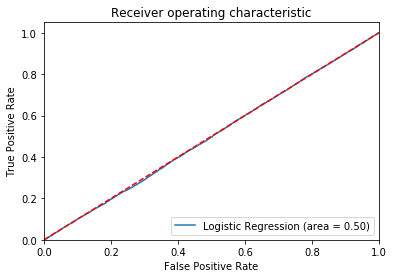

In [451]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### XGBoost Implementation

In [452]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

In [453]:
params = {

        'gamma': [0.5, 1, 1.5, 2, 5],

        'max_depth': [3, 4, 5]

 }

In [454]:
# Using GridSearch CV for XGBoost

In [455]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import time
import warnings
warnings.filterwarnings('ignore')


import xgboost as xgb

start_time = time.time()

clf_xgb = xgb.XGBClassifier(learning_rate=0.3, 
                            n_estimators=600, 
                            max_depth=5,
                            min_child_weight=9,
                            gamma=0.2,
                            subsample=1,
                            colsample_bytree=0.4,
                            objective= 'binary:logistic',
                            nthread=-1,
                            scale_pos_weight=1,
                            reg_alpha = 0.6,
                            reg_lambda = 3,
                            seed=42)
    
clf_xgb = GridSearchCV(
                    clf_xgb, 
                    params,
                    cv=2,
                    scoring='accuracy',
                    )

clf_xgb.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], 
            early_stopping_rounds=100, eval_metric='auc', verbose=100)

predictions = clf_xgb.predict(X_test)

print()
print(classification_report(y_test, predictions))

print()
print("accuracy_score", accuracy_score(y_test, predictions))

print()
predictions_probas = clf_xgb.predict_proba(X_test)
print("roc-auc score for the class 1, from target" , roc_auc_score(y_test, predictions_probas[:,1]))

print()
print("elapsed time in seconds: ", time.time() - start_time)

print('-----')
print(f'Best parameters {clf_xgb.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + 
    f'{clf_xgb.best_score_:.3f}'
)

[0]	validation_0-auc:0.50761	validation_1-auc:0.49808
[100]	validation_0-auc:1.00000	validation_1-auc:1.00000
[113]	validation_0-auc:1.00000	validation_1-auc:1.00000
[0]	validation_0-auc:0.51392	validation_1-auc:0.49853
[100]	validation_0-auc:1.00000	validation_1-auc:1.00000
[101]	validation_0-auc:1.00000	validation_1-auc:1.00000
[0]	validation_0-auc:0.50997	validation_1-auc:0.49683
[100]	validation_0-auc:1.00000	validation_1-auc:1.00000
[0]	validation_0-auc:0.51504	validation_1-auc:0.49905
[100]	validation_0-auc:1.00000	validation_1-auc:1.00000
[0]	validation_0-auc:0.52134	validation_1-auc:0.49689
[100]	validation_0-auc:1.00000	validation_1-auc:1.00000
[101]	validation_0-auc:1.00000	validation_1-auc:1.00000
[0]	validation_0-auc:0.51632	validation_1-auc:0.49820
[100]	validation_0-auc:1.00000	validation_1-auc:1.00000
[101]	validation_0-auc:1.00000	validation_1-auc:1.00000
[0]	validation_0-auc:0.50761	validation_1-auc:0.49808
[100]	validation_0-auc:1.00000	validation_1-auc:1.00000
[101]	

### Stacking - Scenario 2 - Gender

In [456]:
# Stacking below is being done on Gender Scenario 2

In [457]:
import pandas as pd
from sklearn import preprocessing
from mlxtend.classifier import StackingCVClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn import model_selection
import numpy as np
from xgboost import XGBClassifier

In [458]:
# data for training 

In [459]:
X_train.head()

,Device_id,Group,device_model,phone_brand
5458,-3994292212856080000,1,450,86
5459,8836571545583980000,2,708,11
5460,-727204878593826000,3,1194,88
5461,8256066307270200000,1,451,86
5462,7850241797817570000,4,1133,88


In [460]:
y_train.head()

5458    0
5459    0
5460    1
5461    0
5462    1
Name: Gender, dtype: int32

In [461]:
# test data

In [462]:
predids = y_test 
preddata = X_test
preddata.head()

,Device_id,Group,device_model,phone_brand
0,-7548291590301750000,5,1389,11
1,-1819925713085810000,0,727,24
2,3670076507269740000,5,1308,21
3,5333872006968810000,5,1322,37
4,5263633571423510000,4,1289,11


In [463]:
predids.head()

0    1
1    0
2    1
3    1
4    1
Name: Gender, dtype: int32

In [464]:
# Scaling the data
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(X_train)
X_train = pd.DataFrame(scaled_df)
scaled_df = scaler.fit_transform(preddata)
preddata = pd.DataFrame(scaled_df)

In [465]:
# x,y to np 
x_train = X_train.values
y_train = y_train.values

In [466]:
# Individual set of models
clf1 = LogisticRegression()
clf2 = RandomForestClassifier(random_state=1, n_estimators=10)
xgb = XGBClassifier()

#Stacking the various models initialized before

stacking_demo = StackingCVClassifier(classifiers=[clf1, clf2], meta_classifier=xgb, use_probas=True, cv=3)

In [467]:
# Do CV
 
for clf, label in zip([clf1, clf2, stacking_demo], 
                      ['lr', 
                       'Random Forest', 
                       'StackingClassifier']):

    scores = model_selection.cross_val_score(clf, x_train, y_train, cv=3, scoring='roc_auc')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))


Accuracy: 1.00 (+/- 0.00) [lr]
Accuracy: 1.00 (+/- 0.00) [Random Forest]
[21:28:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:28:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:28:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavio

In [468]:
# Fit on train data / predict on test data
sclf_fit = stacking_demo.fit(x_train, y_train)
mypreds = sclf_fit.predict_proba(preddata)
# "predict" give us classes, "predict_proba" give us probabilities

# Probabilities for classes (1,0)
zeros = [i[0] for i in mypreds]
ones  = [i[1] for i in mypreds]

# Get Device IDs Index and predictions
y_id = predids.values.tolist()
preddf = pd.DataFrame({'device_id': y_id,'target': ones})
preddf['device_id'] = preddf['device_id'].map(lambda x: str(x)[:-2])
preddf['device_id'] = preddf['device_id'].map(lambda x: str(x)[2:])

# Look at predictions
print(preddf.head())

[21:28:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  device_id    target
0            0.999915
1            0.000159
2            0.999915
3            0.999915
4            0.999915
